# COM502: Machine Learning
## Lecture 8
### Term paper_Hyeyoung Park

Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bs4 as bs
import requests
import scipy.stats as stats
from scipy.stats import kstest
from sklearn.mixture import GaussianMixture

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

In [ ]:
import statsmodels as sm
from statsmodels.stats.diagnostic import kstest_normal

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

return_first = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[COM502] Term paper/return_first.csv', encoding='utf-8-sig')
return_last = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[COM502] Term paper/return_last.csv', encoding='utf-8-sig')
return_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[COM502] Term paper/return_full.csv', encoding='utf-8-sig')

Mounted at /content/drive


## **Q1.**

In [ ]:
return_first_KS = return_first.iloc[:80,3]
kstest_normal(return_first_KS)

(0.11338823488346161, 0.012715744973561897)

In [ ]:
return_last_KS = return_last.iloc[:80,3]
kstest_normal(return_last_KS)

(0.17255764658603923, 3.461717791031427e-06)

In [ ]:
#KS test KS statistic이 작거나, p-값이 높으면 두 표본의 분포가 같다는 가설을 기각할 수 없음. 즉, 정규분포다. 
return_full_KS = return_full.iloc[:80,3]
kstest_normal(return_full_KS)

(0.11338797969330938, 0.012716083704680043)

## **Q2. period of sub-intervals**

In [ ]:
return_full_V1=return_full.iloc[:,:2]

return_full_V1
return_full_V1.columns = ['DatePeriod','V1']


In [ ]:
ks_list_sub = []

for x in range(1, 1222, 80):
    start = x
    end = x+80
    temp = return_full_V1[(return_full_V1["DatePeriod"] >= start) & (return_full_V1["DatePeriod"] < end)]  

    ks_list_sub.append(kstest_normal(temp['V1'], 'norm'))

print(ks_list_sub)

[(0.07053967880282153, 0.2), (0.09090179675463667, 0.09914628369652444), (0.09637889407986891, 0.06346171437921176), (0.08808961589246411, 0.1942325105573076), (0.11134716476746609, 0.015697206105127044), (0.0726361856378652, 0.2), (0.10280091510029582, 0.03597933606672719), (0.10566117763597038, 0.027516367051949254), (0.08560138461708289, 0.2), (0.10491560220479668, 0.029535638987232795), (0.0967637286306734, 0.06142266948221041), (0.1306506382078017, 0.0017645502099850076), (0.05551121274754783, 0.2), (0.07403764196648138, 0.2), (0.0462256993364209, 0.2), (0.13850941503497577, 0.2)]


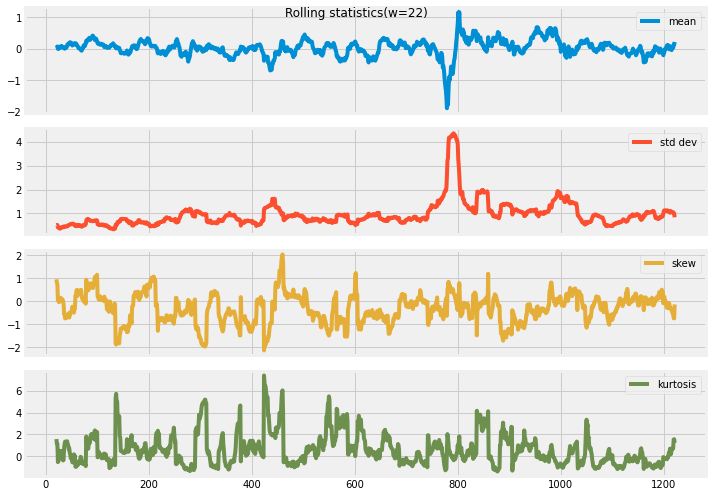

In [ ]:
#Extract V1 columns

w=22

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = return_full_V1[(return_full_V1["DatePeriod"] >= start) & (return_full_V1["DatePeriod"] < end)]  

    s1 = temp['V1'].rolling(w).mean()
    s2 = temp['V1'].rolling(w).std()
    s3 = temp['V1'].rolling(w).skew()
    s4 = temp['V1'].rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=22)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

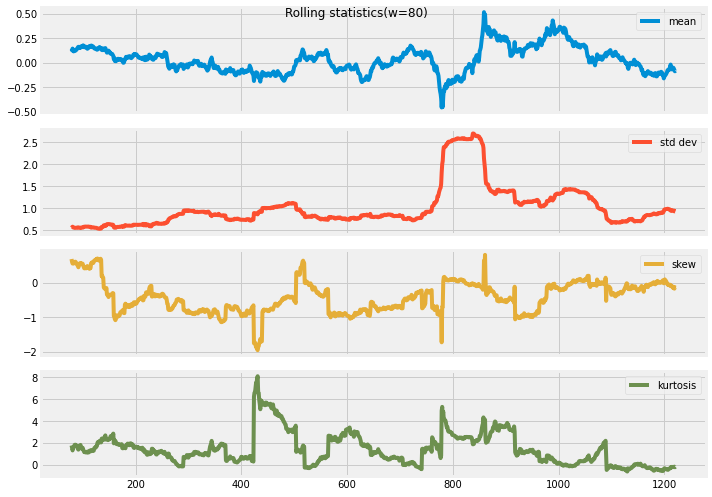

In [ ]:
w=80

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = return_full_V1[(return_full_V1["DatePeriod"] >= start) & (return_full_V1["DatePeriod"] < end)]  

    s1 = temp['V1'].rolling(w).mean()
    s2 = temp['V1'].rolling(w).std()
    s3 = temp['V1'].rolling(w).skew()
    s4 = temp['V1'].rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=80)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

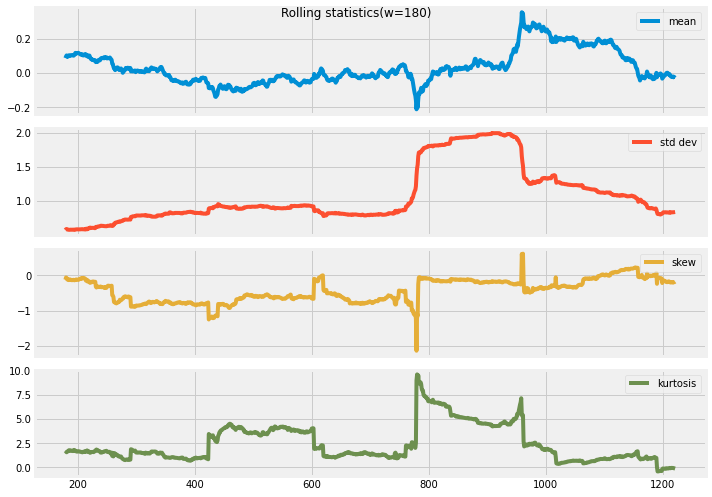

In [ ]:
w=180

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = return_full_V1[(return_full_V1["DatePeriod"] >= start) & (return_full_V1["DatePeriod"] < end)]  

    s1 = temp['V1'].rolling(w).mean()
    s2 = temp['V1'].rolling(w).std()
    s3 = temp['V1'].rolling(w).skew()
    s4 = temp['V1'].rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=180)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

##***Q3. PCA Portfolio*** 

###PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
rs2 =return_full.iloc[:,2:12]

rs2

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,2.778681,-0.331676,3.178111,-2.534988,-1.081076,-0.565513,-0.986449,-2.429278,-0.587879,-0.998356
1,0.053737,0.991759,0.402822,1.655039,-0.970885,1.127833,0.371072,2.229056,1.984864,0.111426
2,2.754408,-2.329570,3.651119,0.503757,1.452818,4.567006,-0.495069,7.525269,0.230960,0.886931
3,1.349290,-0.337258,-1.957009,0.750953,-1.574842,1.769946,0.618443,-0.933722,1.715295,0.220496
4,-3.514677,0.673388,-0.594652,-1.507559,2.412668,-0.704221,0.000000,0.374544,-0.568506,-1.330380
...,...,...,...,...,...,...,...,...,...,...
1217,0.748136,3.062664,0.391390,1.574837,1.318698,-2.071781,1.063211,0.176214,0.000000,-0.263510
1218,-0.373363,-0.932404,-1.574836,-0.915645,-1.318698,0.961544,-0.353143,-0.884178,-1.227011,0.000000
1219,0.124606,0.233919,1.183446,1.045768,0.441501,0.794285,-0.354404,0.707965,0.176212,0.657471
1220,-1.435085,0.947874,0.822269,-0.521934,0.486268,1.282069,2.304529,0.179372,1.436258,1.217054


In [ ]:
scaler = StandardScaler()
rs2_std = pd.DataFrame(scaler.fit_transform(rs2))

In [ ]:
print(rs2_std.describe())

                  0             1             2             3             4  \
count  1.222000e+03  1.222000e+03  1.222000e+03  1.222000e+03  1.222000e+03   
mean   5.224045e-18 -1.299197e-17 -1.562671e-17 -6.405133e-18  1.462732e-17   
std    1.000409e+00  1.000409e+00  1.000409e+00  1.000409e+00  1.000409e+00   
min   -4.052189e+00 -6.241694e+00 -4.162009e+00 -3.981874e+00 -4.758879e+00   
25%   -5.693229e-01 -5.266173e-01 -6.262758e-01 -5.734734e-01 -5.921118e-01   
50%   -4.536677e-02 -1.692421e-02  1.174423e-02 -3.432387e-02 -6.907566e-02   
75%    5.650936e-01  4.579826e-01  6.157222e-01  5.145615e-01  5.019233e-01   
max    5.999288e+00  8.047999e+00  5.410184e+00  6.240395e+00  4.769906e+00   

                  5             6             7             8             9  
count  1.222000e+03  1.222000e+03  1.222000e+03  1.222000e+03  1.222000e+03  
mean   1.253771e-17  2.425774e-17 -1.907912e-18  3.645475e-18 -1.817059e-18  
std    1.000409e+00  1.000409e+00  1.000409e+00  1.000

In [ ]:
pc_num = 10
pca = PCA(n_components= pc_num, svd_solver='auto')
pca.fit(rs2_std)

PCA(n_components=10)

In [ ]:
print(pca.explained_variance_ratio_)

[0.34530256 0.13248647 0.10877644 0.10035507 0.08485119 0.06678572
 0.05360591 0.0482671  0.03181951 0.02775004]


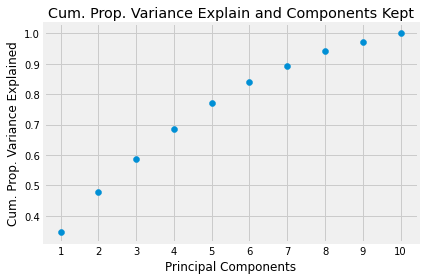

In [ ]:
var_comp_sum  = np.cumsum(pca.explained_variance_ratio_)
#var_comp_sum = pd.Series(np.cumsum(pca.explained_variance_ratio_))

# x-axis for number of principal components kept
num_comp = range(1, len(pca.explained_variance_ratio_) + 1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Explained')
plt.xticks(range(11), range(11))

#plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(num_comp, var_comp_sum)
plt.show()

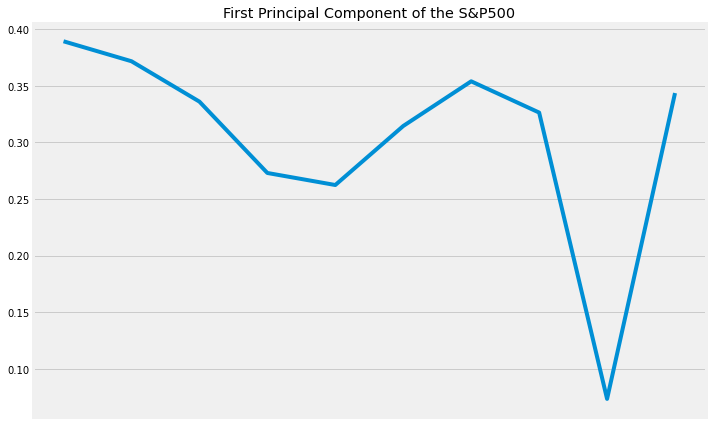

In [ ]:
#loadings
pc1 = pd.Series(index=rs2.columns, data=pca.components_[0])

pc1.plot(figsize=(10, 6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

### Loadings

In [ ]:
pcs_col = ['PC' + str(1+i) for i in range(pc_num)]
pc_df = pd.DataFrame(pca.components_)
pc_df.columns = rs2.columns
pcs_df = pc_df.T
pcs_df.columns = pcs_col
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
V2,0.389313,0.186373,-0.404254,-0.093085,-0.282784,-0.004388,0.088682,-0.012155,0.672105,0.319203
V3,0.371669,-0.330506,0.362116,-0.061766,-0.303278,0.091153,-0.054488,0.058675,0.279352,-0.657989
V4,0.336005,0.263116,-0.463428,-0.096294,-0.404280,0.017436,-0.101159,0.003766,-0.599647,-0.245486
V5,0.272959,0.454578,0.351182,0.219002,0.055781,-0.248653,0.450383,0.522990,-0.077729,0.014742
V6,0.262324,0.501376,0.339354,0.123967,0.158251,-0.148925,-0.448064,-0.546404,0.050909,-0.012122
V7,0.314471,0.113723,0.007495,-0.197194,0.459124,0.788941,0.104265,0.042133,-0.056785,0.011834
V8,0.353938,-0.376663,0.378352,-0.035085,-0.300655,0.059534,-0.103443,-0.008250,-0.290587,0.631921
V9,0.326334,-0.243039,-0.230664,-0.020974,0.481227,-0.333723,-0.503082,0.429658,0.011913,-0.001570
V10,0.073329,-0.133162,-0.174872,0.934420,-0.039497,0.258668,-0.064844,-0.010564,0.016876,-0.010015
V11,0.343574,-0.311727,-0.158754,0.034950,0.319579,-0.321106,0.544482,-0.487605,-0.118046,-0.070471


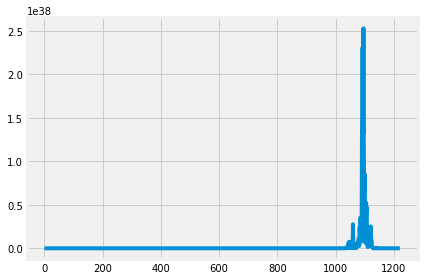

In [ ]:
weights = abs(pc1) / sum(abs(pc1))
myrs = (weights * rs2).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [ ]:
#rs2에 곱해지기 전 weight 확인 

weights_df = pd.DataFrame()

for i in range(len(pcs_df.columns)):
  weights_pcs = abs(pcs_df[pcs_col[i]]) / sum(abs(pcs_df[pcs_col[i]]))
  weights_df = pd.concat([weights_df,weights_pcs], axis=1)

weights_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
V2,0.127899,0.063952,0.140832,0.051238,0.100834,0.001931,0.036007,0.005727,0.309163,0.161593
V3,0.122102,0.113410,0.126152,0.033999,0.108142,0.040111,0.022124,0.027648,0.128500,0.333099
V4,0.110386,0.090285,0.161447,0.053004,0.144156,0.007673,0.041073,0.001775,0.275833,0.124274
V5,0.089674,0.155984,0.122343,0.120547,0.019890,0.109417,0.182868,0.246438,0.035755,0.007463
V6,0.086180,0.172042,0.118222,0.068236,0.056429,0.065533,0.181926,0.257471,0.023418,0.006137
V7,0.103311,0.039023,0.002611,0.108543,0.163712,0.347165,0.042334,0.019853,0.026121,0.005991
V8,0.116277,0.129248,0.131808,0.019312,0.107206,0.026197,0.042001,0.003887,0.133668,0.319903
V9,0.107209,0.083396,0.080358,0.011545,0.171594,0.146851,0.204265,0.202459,0.005480,0.000795
V10,0.024090,0.045693,0.060921,0.514339,0.014084,0.113824,0.026328,0.004978,0.007763,0.005070
V11,0.112872,0.106966,0.055306,0.019238,0.113954,0.141299,0.221074,0.229764,0.054300,0.035675


In [ ]:
myrs_df = pd.DataFrame()

for i in range(len(pcs_df.columns)):
  weights_pcs = abs(pcs_df[pcs_col[i]]) / sum(abs(pcs_df[pcs_col[i]]))
  myrs_pcs = (weights_pcs * rs2).sum(1)
  myrs_df = pd.concat([myrs_df,myrs_pcs], axis=1)


myrs_df.columns = pcs_col
myrs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.215193,-0.640193,0.006897,-0.509859,-0.146193,-1.118662,-1.234769,-1.629881,1.358401,0.348456
1,0.696210,0.623887,0.643476,1.369438,0.796437,1.130713,0.761986,0.696941,0.404340,0.536766
2,1.967955,1.417356,1.531383,1.124201,2.734357,2.919456,2.465883,2.273286,1.755654,0.043309
3,0.067861,-0.109356,-0.134985,1.016766,-0.011336,0.672969,-0.184352,-0.317778,-0.026953,0.082696
4,-0.556666,-0.186692,-0.485195,-0.595920,-0.471771,-0.433353,-0.235225,0.000450,-1.254501,-0.468253
...,...,...,...,...,...,...,...,...,...,...
1217,0.666451,0.946119,1.037798,0.235649,0.343812,-0.316727,0.573351,0.755415,0.894653,1.528002
1218,-0.597270,-0.779428,-0.882218,-0.878423,-0.507569,-0.181752,-0.693140,-0.763289,-0.769713,-0.695688
1219,0.502166,0.503035,0.477607,0.424079,0.545101,0.645447,0.643169,0.690337,0.457069,0.171935
1220,0.609680,0.650862,0.520183,0.920416,0.740038,0.883567,0.490670,0.373535,0.317410,0.980861


No handles with labels found to put in legend.
No handles with labels found to put in legend.


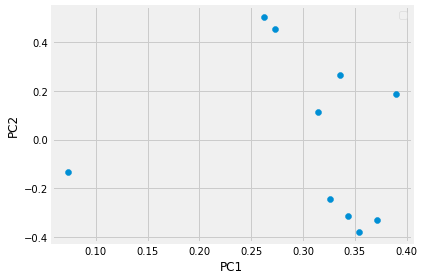

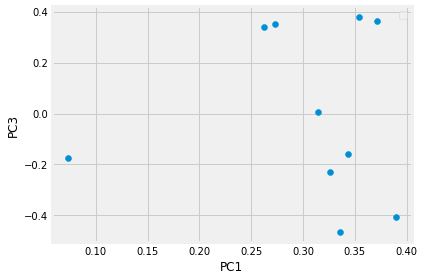

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Color classes

fig, ax = plt.subplots()
ax.scatter(x=pcs_df["PC1"], y=pcs_df["PC2"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

fig, ax = plt.subplots()
ax.scatter(x=pcs_df["PC1"], y=pcs_df["PC3"])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend()


In [ ]:
weights_recover = pd.DataFrame(pca.explained_variance_ratio_, pcs_col)

weights_recover

,0
PC1,0.345303
PC2,0.132486
PC3,0.108776
PC4,0.100355
PC5,0.084851
PC6,0.066786
PC7,0.053606
PC8,0.048267
PC9,0.031820
PC10,0.027750


In [ ]:
myrs_recover = myrs_df.dot(weights_recover)

myrs_recover

,0
0,-0.388623
1,0.775826
2,1.872686
3,0.116498
4,-0.464005
...,...
1217,0.638098
1218,-0.666623
1219,0.511027
1220,0.649160


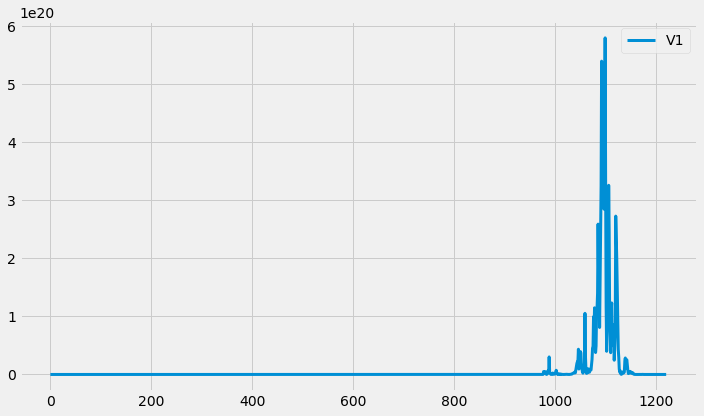

In [ ]:
#PCA portfolio와 비교하기 위한 Market index 이용 => 원래는 S&P500 
prices = return_full.iloc[:,1]
prices = pd.DataFrame(prices)

prices.fillna(0).cumsum().apply(np.exp).plot(subplots=True, figsize=(10, 6), grid=True, linewidth=3)
plt.tight_layout()

In [ ]:
rs_df = pd.DataFrame({'PC1 Portfolio': pd.DataFrame(myrs).reset_index()[0],
                      'PCA Portfolio': pd.DataFrame(myrs_recover).reset_index()[0],
                      'Composite Index': prices.reset_index()['V1']})

In [ ]:
rs_df

,PC1 Portfolio,PCA Portfolio,Composite Index
0,-0.215193,-0.388623,-0.016598
1,0.696210,0.775826,-0.178804
2,1.967955,1.872686,1.458658
3,0.067861,0.116498,0.575162
4,-0.556666,-0.464005,-0.497121
...,...,...,...
1217,0.666451,0.638098,0.474496
1218,-0.597270,-0.666623,-0.428475
1219,0.502166,0.511027,0.687400
1220,0.609680,0.649160,-0.896317


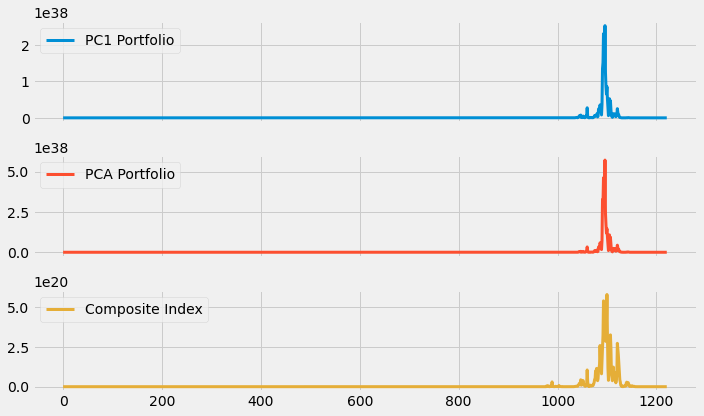

In [ ]:
rs_df.fillna(0).cumsum().apply(np.exp).plot(subplots=True, figsize=(10, 6), grid=True, linewidth=3)
plt.tight_layout()

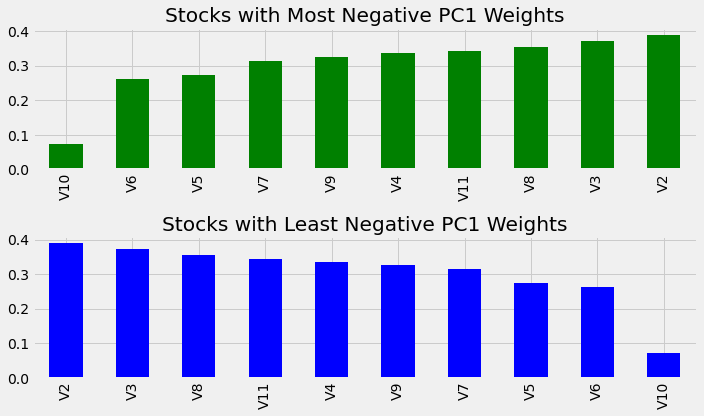

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PC1 Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PC1 Weights')

plt.tight_layout()
plt.savefig('industry.png')

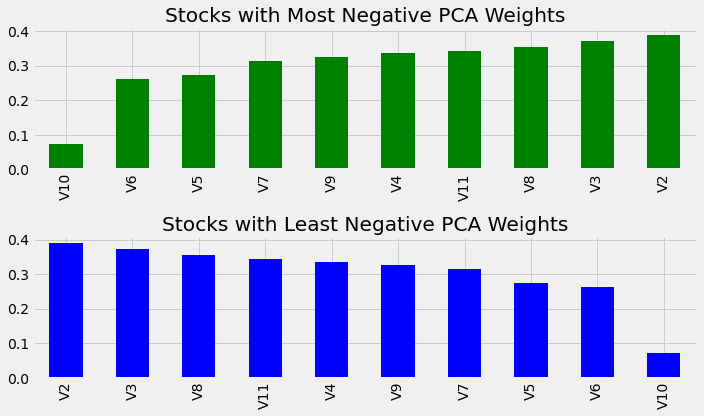

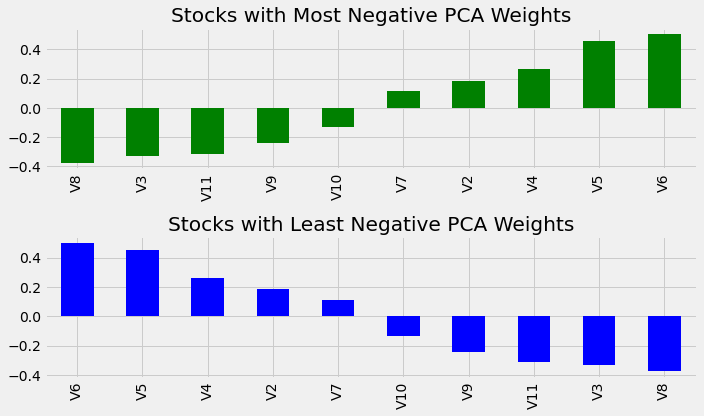

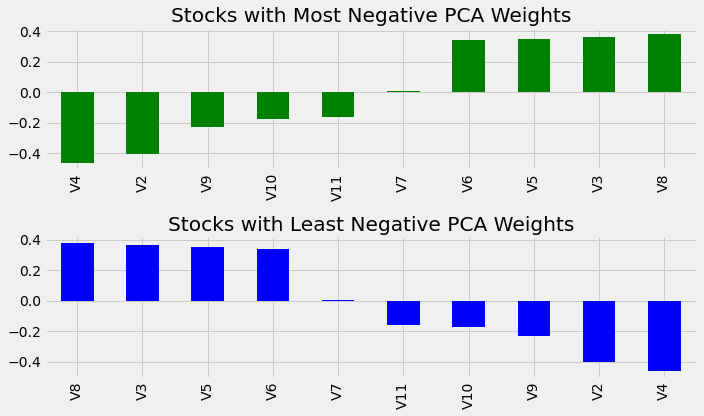

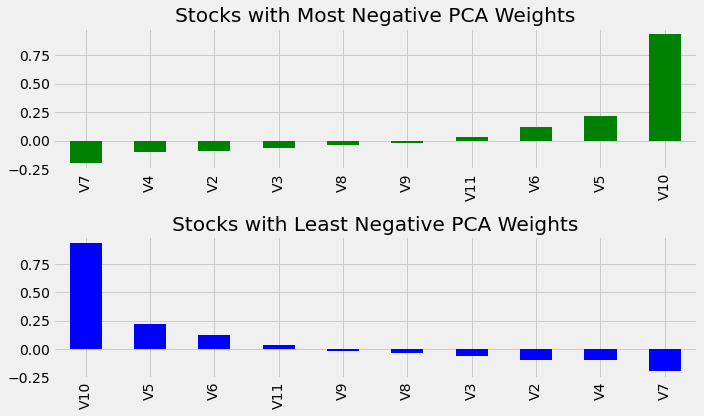

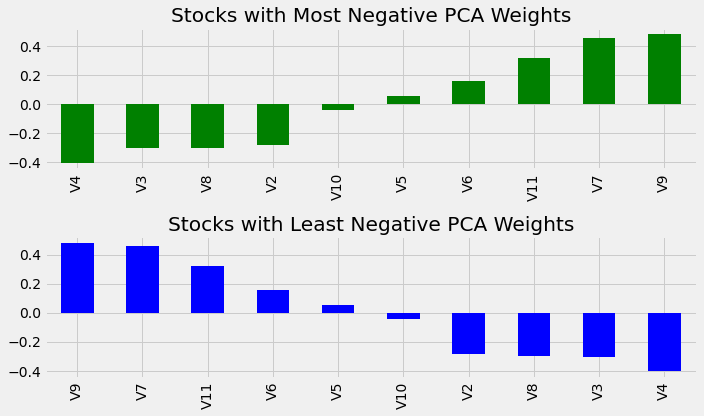

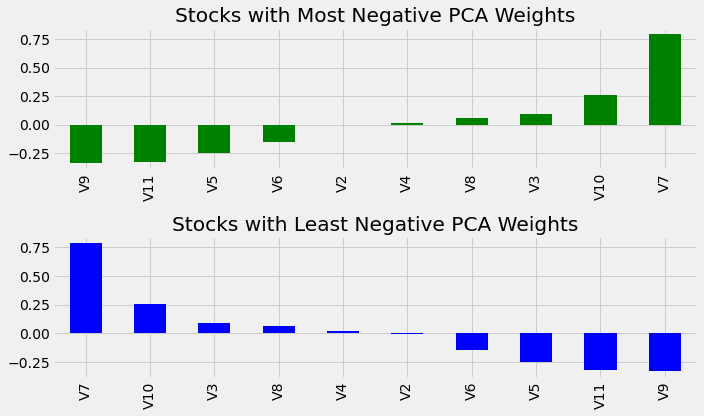

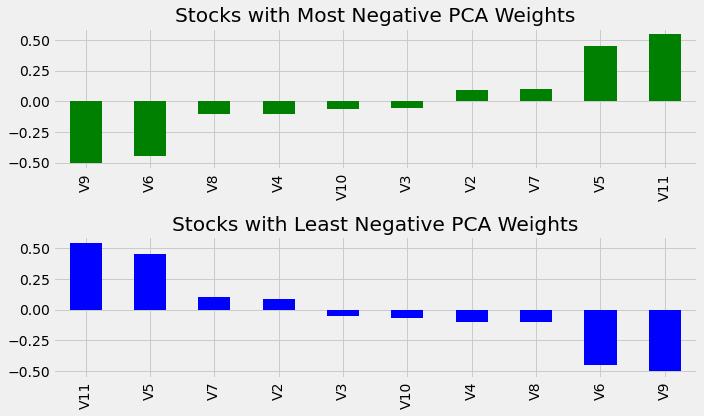

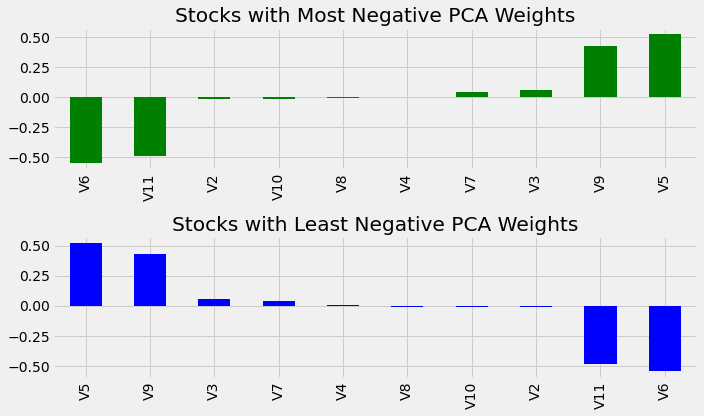

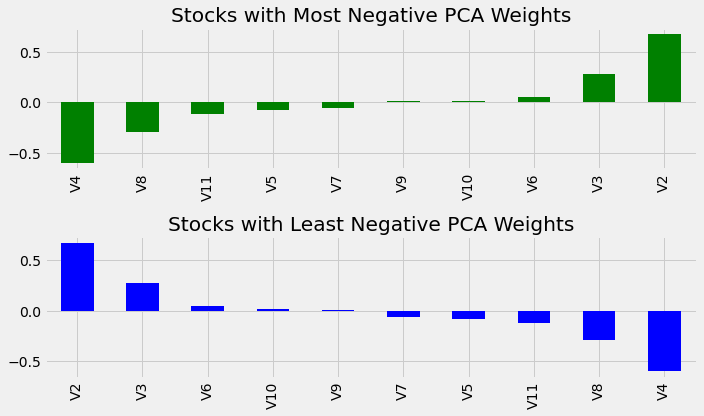

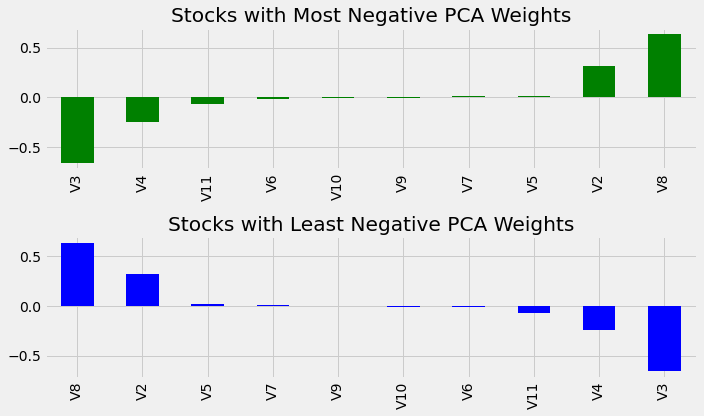

In [ ]:
for i in range(len(pcs_df.columns)):
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  pcs_df[pcs_col[i]].nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
  pcs_df[pcs_col[i]].nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

  plt.tight_layout()

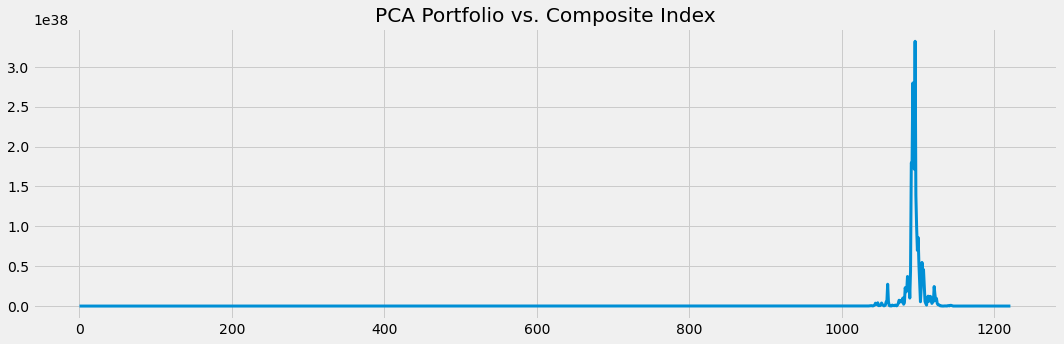

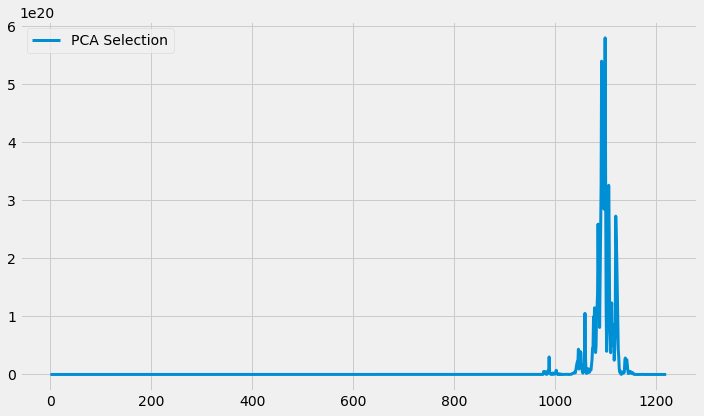

In [ ]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs2[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15, 5), grid=True, linewidth=3, title='PCA Portfolio vs. Composite Index')
prices.fillna(0).cumsum().apply(np.exp).plot(subplots=False, figsize=(10, 6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'Composite Index'])

plt.tight_layout()

### Conduct GMM after removing PC1

In [ ]:
exceptPC_num = 1
exceptPC_num = exceptPC_num - 1

weights_recover_exceptPC = weights_recover.copy()
weights_recover_exceptPC.iat[exceptPC_num,0] = 0

weights_recover_exceptPC

,0
PC1,0.000000
PC2,0.132486
PC3,0.108776
PC4,0.100355
PC5,0.084851
PC6,0.066786
PC7,0.053606
PC8,0.048267
PC9,0.031820
PC10,0.027750


In [ ]:
myrs_recover_exceptPC = myrs_df.dot(weights_recover_exceptPC)

myrs_recover_exceptPC

,0
DatePeriod,
0,-0.314316
1,0.535423
2,1.193146
3,0.093066
4,-0.271787
...,...
1217,0.407971
1218,-0.460384
1219,0.337628


In [ ]:
rs_df_except = pd.DataFrame({'PC1 Portfolio': pd.DataFrame(myrs).reset_index()[0],
                      'PCA Portfolio': pd.DataFrame(myrs_recover).reset_index()[0],
                      'ExceptPCA Portfolio': pd.DataFrame(myrs_recover_exceptPC).reset_index()[0],
                      'Composite Index': prices.reset_index()['V1']})

In [ ]:
rs_df_except

,PC1 Portfolio,PCA Portfolio,ExceptPCA Portfolio,Composite Index
0,-0.355842,-0.388623,-0.314316,-0.016598
1,0.795672,0.775826,0.535423,-0.178804
2,1.874763,1.872686,1.193146,1.458658
3,0.162159,0.116498,0.093066,0.575162
4,-0.475940,-0.464005,-0.271787,-0.497121
...,...,...,...,...
1217,0.599986,0.638098,0.407971,0.474496
1218,-0.661774,-0.666623,-0.460384,-0.428475
1219,0.501077,0.511027,0.337628,0.687400
1220,0.671867,0.649160,0.438636,-0.896317


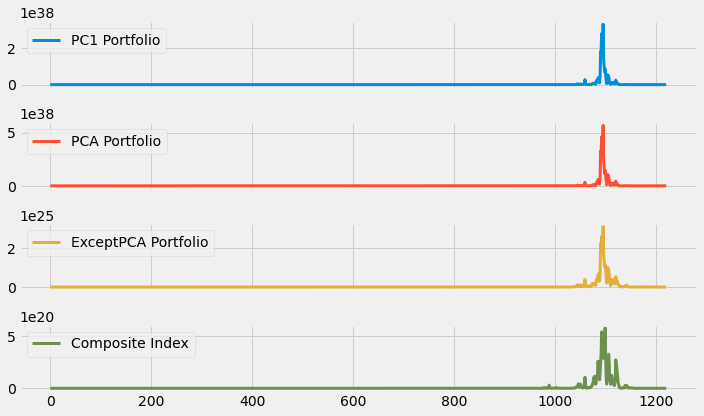

In [ ]:
rs_df_except.fillna(0).cumsum().apply(np.exp).plot(subplots=True, figsize=(10, 6), grid=True, linewidth=3)
plt.tight_layout()

In [ ]:
kstest_normal(myrs_recover_exceptPC.iloc[:80,:], 'norm')

(0.9904139979934432, 2.6888703728368336e-236)

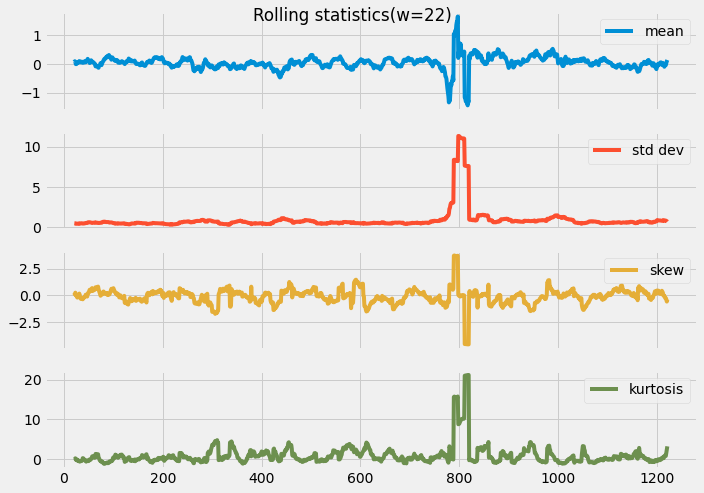

In [ ]:
w=22

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = myrs_recover_exceptPC  

    s1 = temp.rolling(w).mean()
    s2 = temp.rolling(w).std()
    s3 = temp.rolling(w).skew()
    s4 = temp.rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=22)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

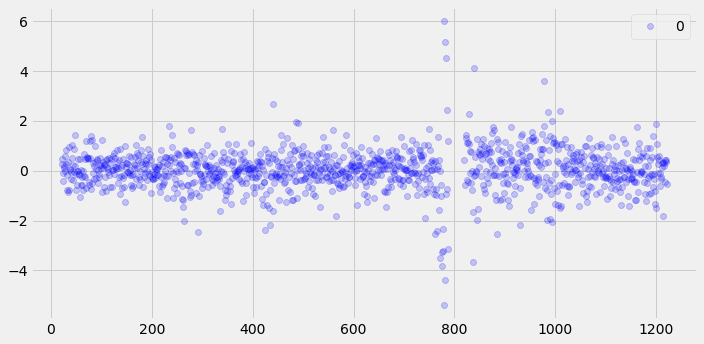

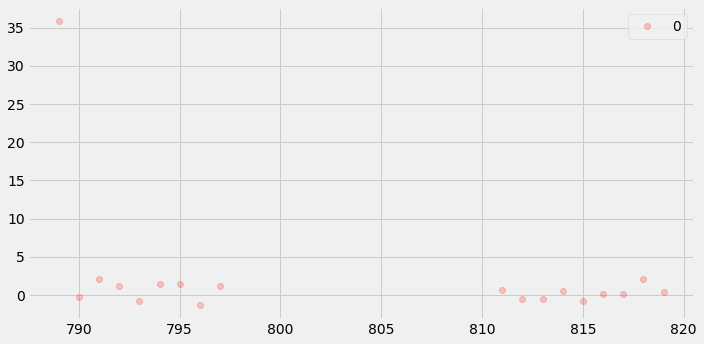

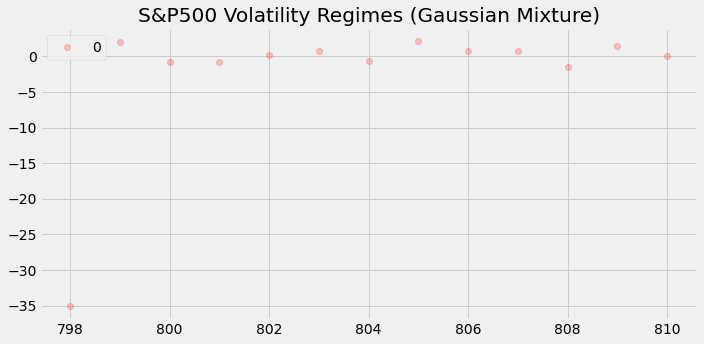

In [ ]:
w = 22
vol = myrs_recover_exceptPC.rolling(w).std()
vol = vol.dropna()

labels = GaussianMixture(3).fit_predict(vol.values.reshape(-1, 1))

prices = myrs_recover_exceptPC.reindex(vol.index)
prices[labels == 0].plot(style='bo', alpha=0.2)
prices[labels == 1].plot(subplots = True, style='ro', alpha=0.2)
prices[labels == 2].plot(subplots = True, style='ro', alpha=0.2)
plt.title('S&P500 Volatility Regimes (Gaussian Mixture)')
plt.tight_layout()
plt.savefig('gmm.png')

In [ ]:
myrs_exceptPC = myrs_recover_exceptPC.copy()

myrs_exceptPC.index.name = "DatePeriod"
df = pd.DataFrame(myrs_exceptPC.index)
myrs_exceptPC = pd.concat([df, myrs_recover_exceptPC], axis = 1)
myrs_exceptPC.columns = ['DatePeriod','V1']
myrs_exceptPC

,DatePeriod,V1
0,0,-0.314316
1,1,0.535423
2,2,1.193146
3,3,0.093066
4,4,-0.271787
...,...,...
1217,1217,0.407971
1218,1218,-0.460384
1219,1219,0.337628
1220,1220,0.438636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

<Figure size 360x180 with 0 Axes>

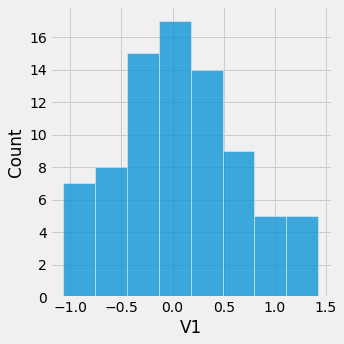

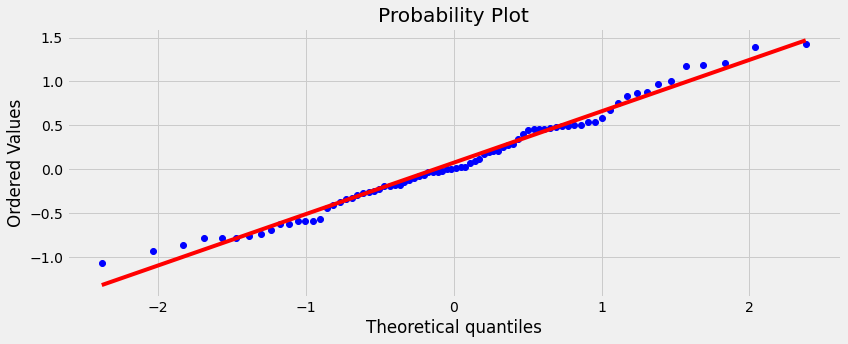

<Figure size 360x180 with 0 Axes>

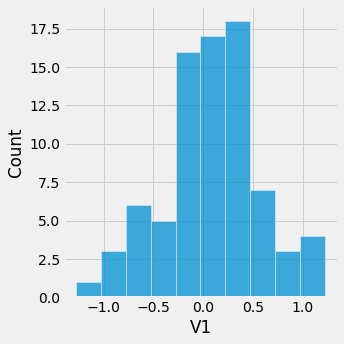

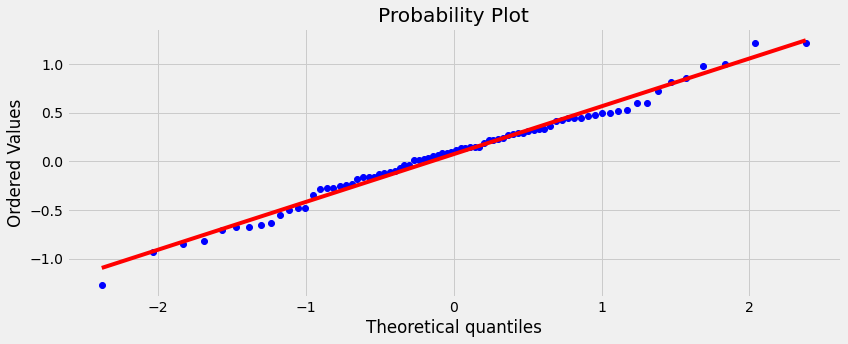

<Figure size 360x180 with 0 Axes>

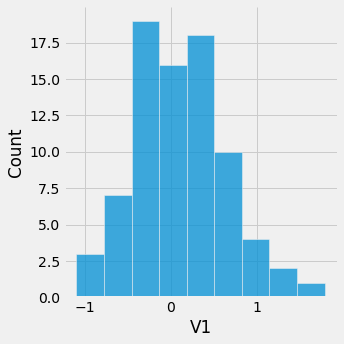

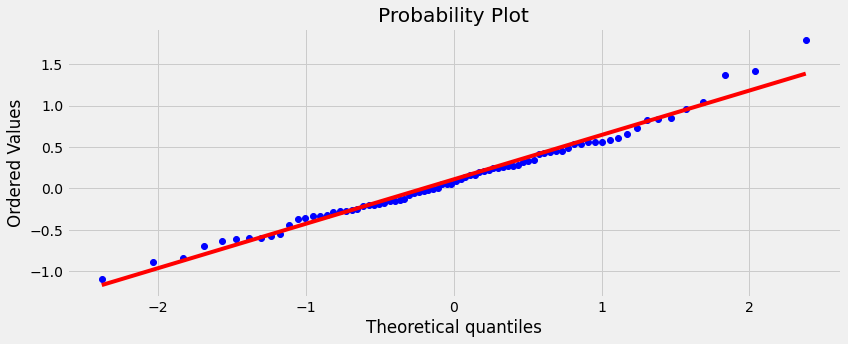

<Figure size 360x180 with 0 Axes>

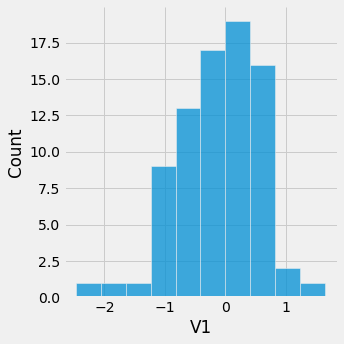

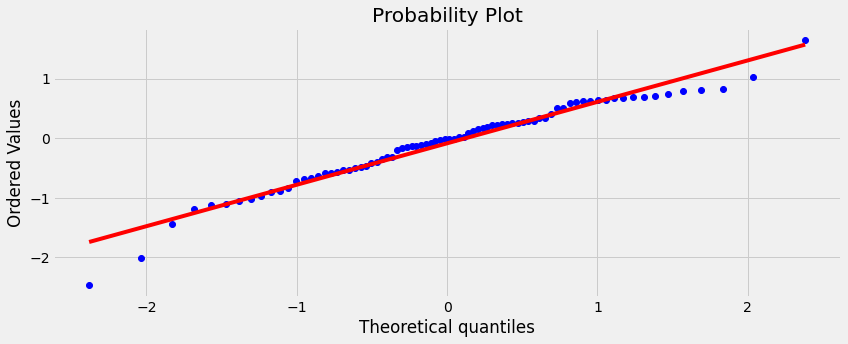

<Figure size 360x180 with 0 Axes>

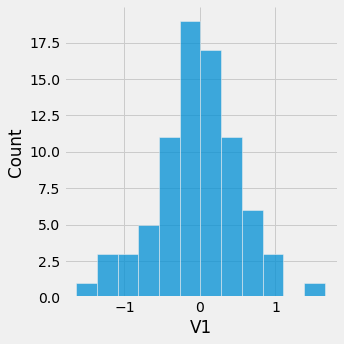

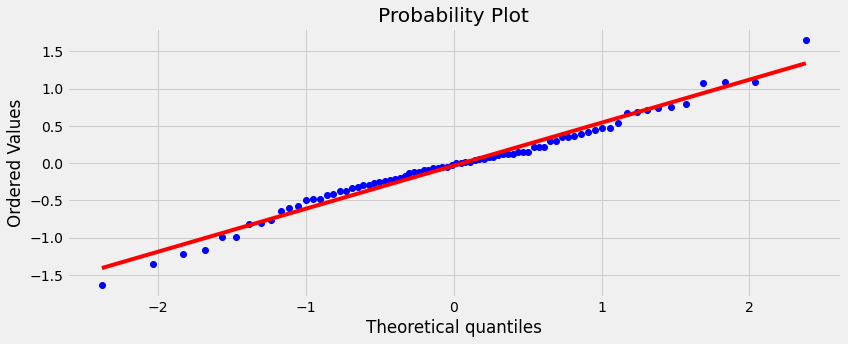

<Figure size 360x180 with 0 Axes>

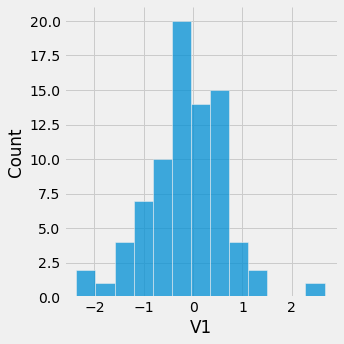

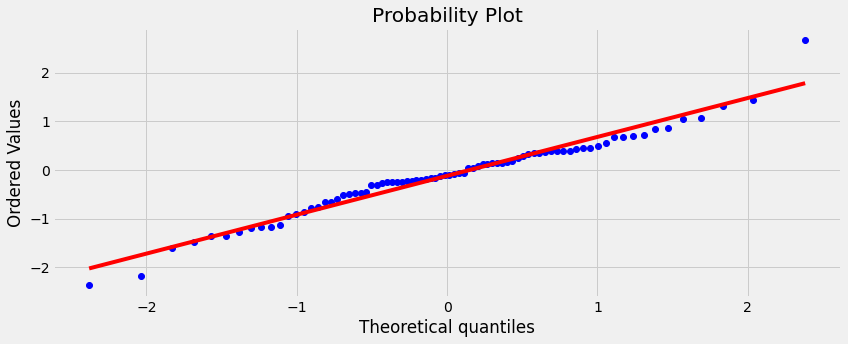

<Figure size 360x180 with 0 Axes>

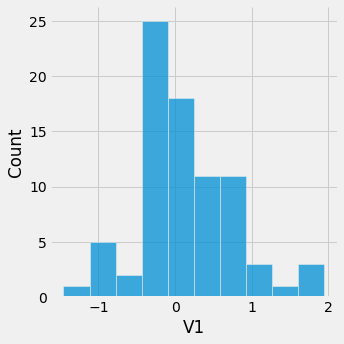

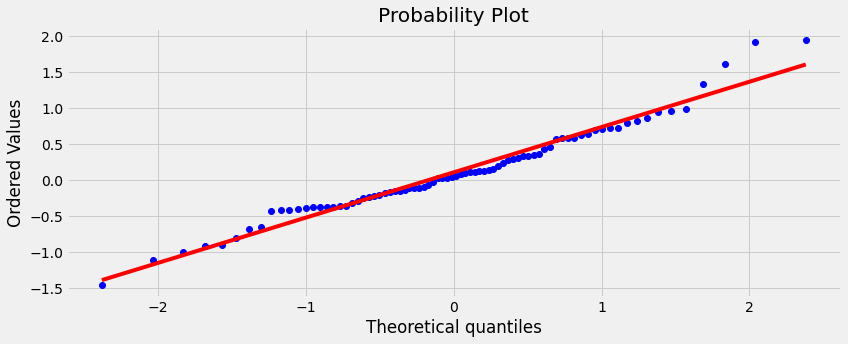

<Figure size 360x180 with 0 Axes>

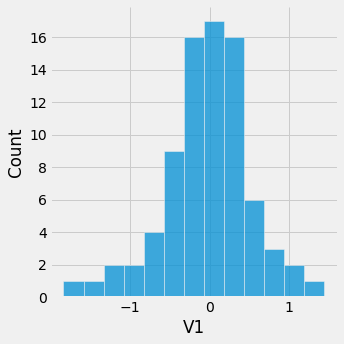

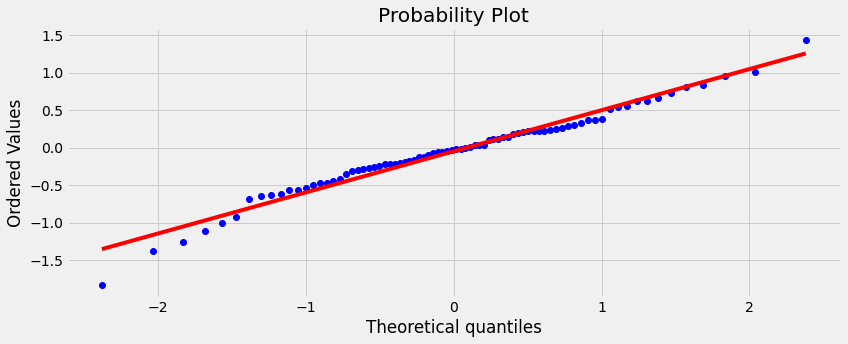

<Figure size 360x180 with 0 Axes>

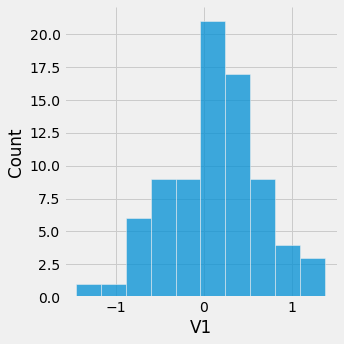

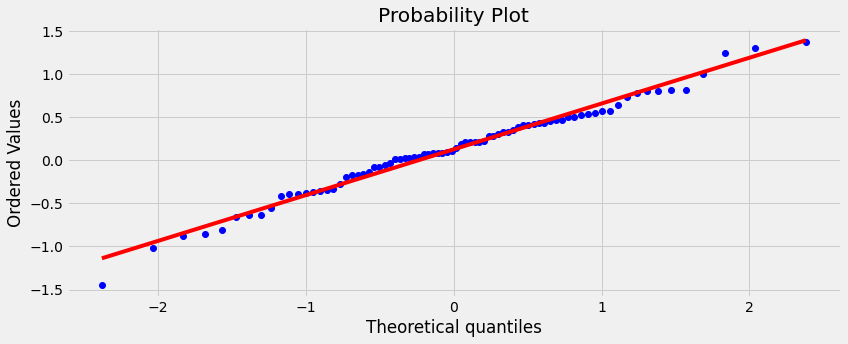

<Figure size 360x180 with 0 Axes>

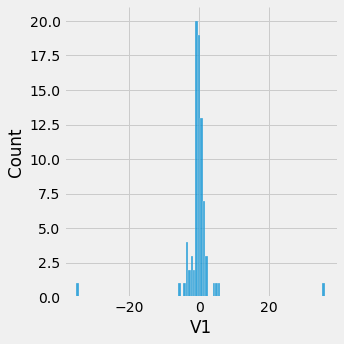

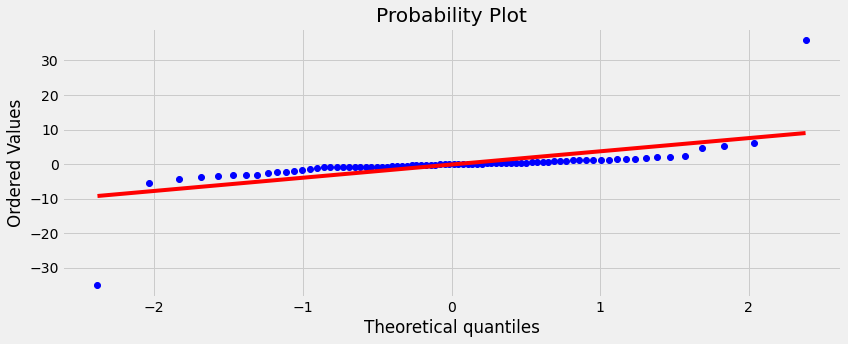

<Figure size 360x180 with 0 Axes>

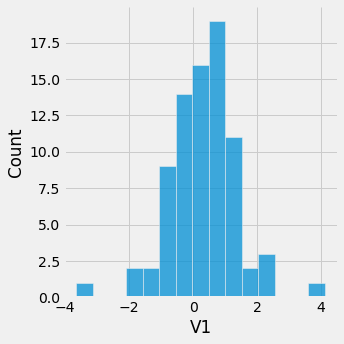

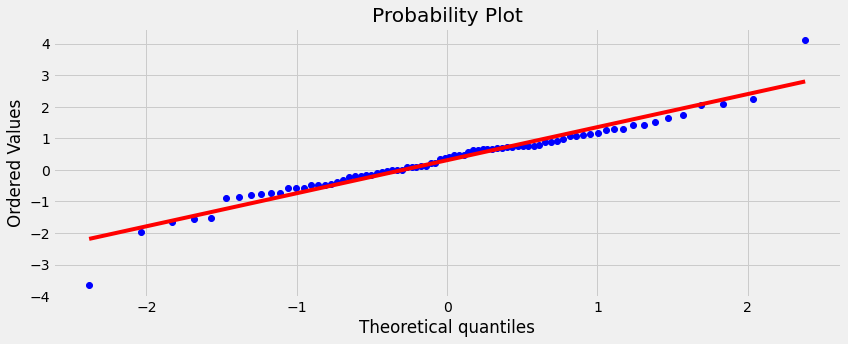

<Figure size 360x180 with 0 Axes>

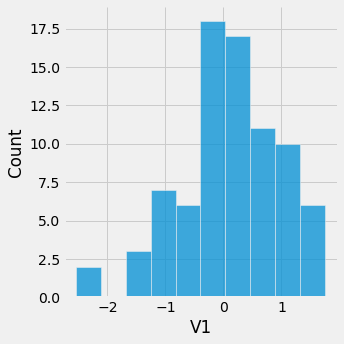

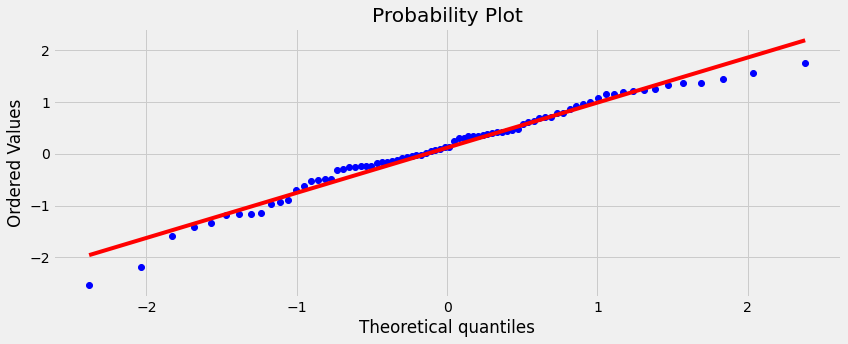

<Figure size 360x180 with 0 Axes>

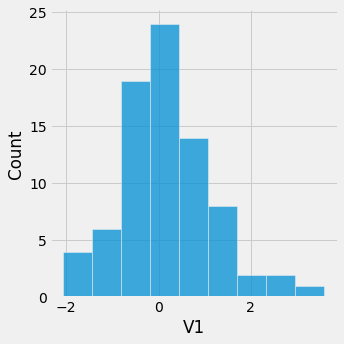

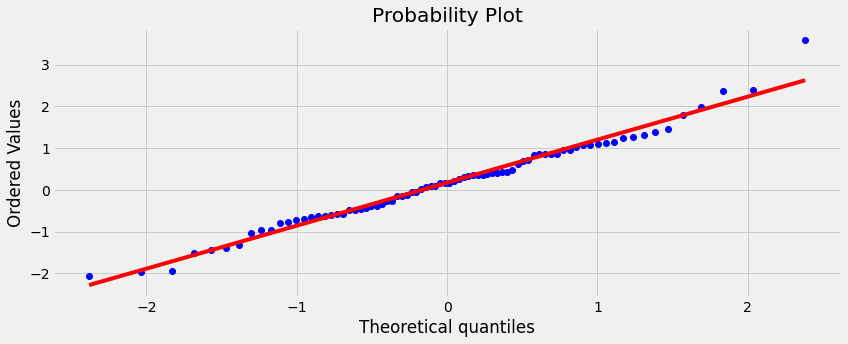

<Figure size 360x180 with 0 Axes>

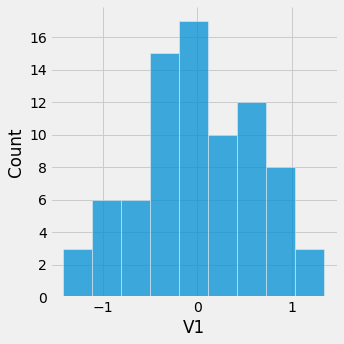

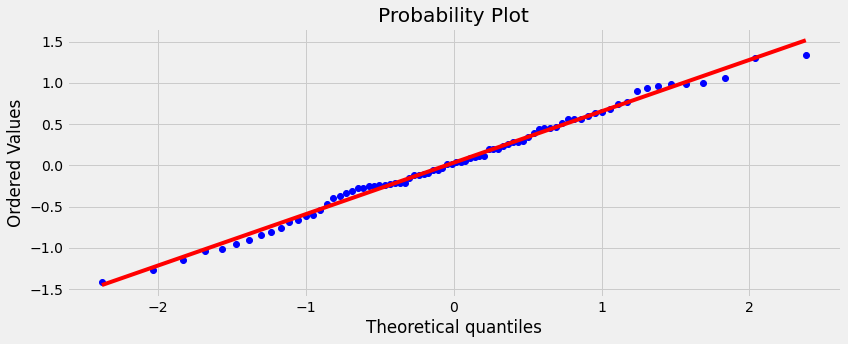

<Figure size 360x180 with 0 Axes>

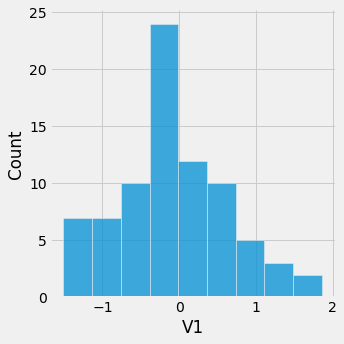

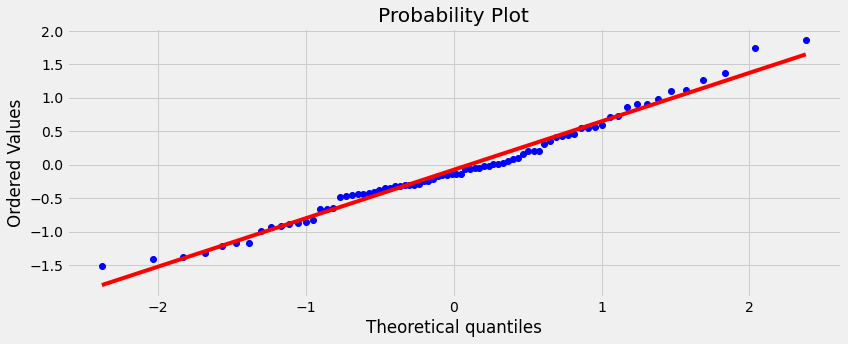

<Figure size 360x180 with 0 Axes>

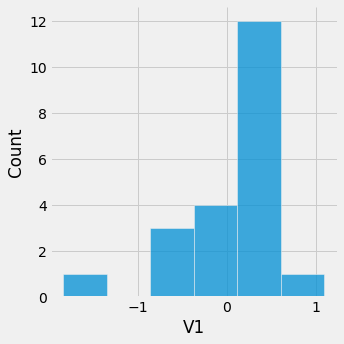

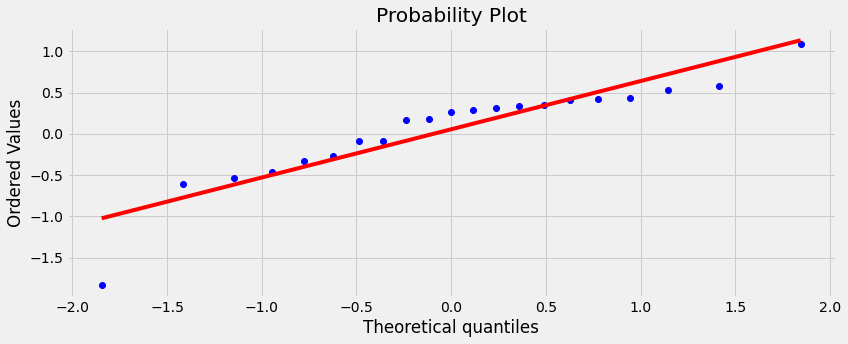

In [ ]:
for x in range(1, 1222, 80):
    start = x
    end = x+80
    temp = myrs_exceptPC[(myrs_exceptPC["DatePeriod"] >= start) & (myrs_exceptPC["DatePeriod"] < end)]  

    plt.figure(figsize=(5, 2.5))
    sns.displot(temp['V1'])
    plt.figure(figsize=(12, 5))
    stats.probplot(temp['V1'], dist=stats.norm, plot=plt)
    plt.legend
    plt.show

In [ ]:
ks_list = []

for x in range(1, 1222, 80):
    start = x
    end = x+80
    temp = myrs_exceptPC[(myrs_exceptPC["DatePeriod"] >= start) & (myrs_exceptPC["DatePeriod"] < end)]  

    ks_list.append(kstest_normal(temp['V1'], 'norm'))

print(ks_list)

[(0.07407761230583021, 0.2), (0.06198010879666005, 0.2), (0.05111258536177232, 0.2), (0.07993188057416711, 0.2), (0.07294932307848379, 0.2), (0.10174146704322046, 0.03964094764021053), (0.09444793781383096, 0.07456757508872913), (0.07396523790224208, 0.2), (0.07687191964221696, 0.2), (0.2951657323335075, 3.4128959777119847e-19), (0.0693761577258275, 0.2), (0.08520414697635567, 0.2), (0.06009752580559369, 0.2), (0.05825963668673212, 0.2), (0.08122638127678283, 0.2), (0.19090710152869161, 0.044242285480059734)]


### Conduct GMM after removing PC1 and PC7 ~ 10

In [ ]:
exceptPC_num = 1
exceptPC_num = exceptPC_num - 1

weights_recover_exceptPC2 = weights_recover.copy()
weights_recover_exceptPC2.iat[exceptPC_num,0] = 0
weights_recover_exceptPC2.iloc[6:,0] = 0

weights_recover_exceptPC2

,0
PC1,0.000000
PC2,0.132486
PC3,0.108776
PC4,0.100355
PC5,0.084851
PC6,0.066786
PC7,0.000000
PC8,0.000000
PC9,0.000000
PC10,0.000000


In [ ]:
myrs_recover_exceptPC2 = myrs_df.dot(weights_recover_exceptPC2)

myrs_recover_exceptPC2

,0
0,-0.222349
1,0.433176
2,0.894170
3,0.116849
4,-0.206288
...,...
1217,0.269905
1218,-0.342589
1219,0.250515
1220,0.356985


In [ ]:
rs_df_except = pd.DataFrame({'PC1 Portfolio': pd.DataFrame(myrs).reset_index()[0],
                      'PCA Portfolio': pd.DataFrame(myrs_recover).reset_index()[0],
                      'ExceptPCA Portfolio': pd.DataFrame(myrs_recover_exceptPC2).reset_index()[0],
                      'Composite Index': prices.reset_index()['V1']})

In [ ]:
rs_df_except

,PC1 Portfolio,PCA Portfolio,ExceptPCA Portfolio,Composite Index
0,-0.355842,-0.388623,-0.222349,0.038722
1,0.795672,0.775826,0.433176,0.444352
2,1.874763,1.872686,0.894170,0.171885
3,0.162159,0.116498,0.116849,-0.196466
4,-0.475940,-0.464005,-0.206288,0.446806
...,...,...,...,...
1217,0.599986,0.638098,0.269905,NaN
1218,-0.661774,-0.666623,-0.342589,NaN
1219,0.501077,0.511027,0.250515,NaN
1220,0.671867,0.649160,0.356985,NaN


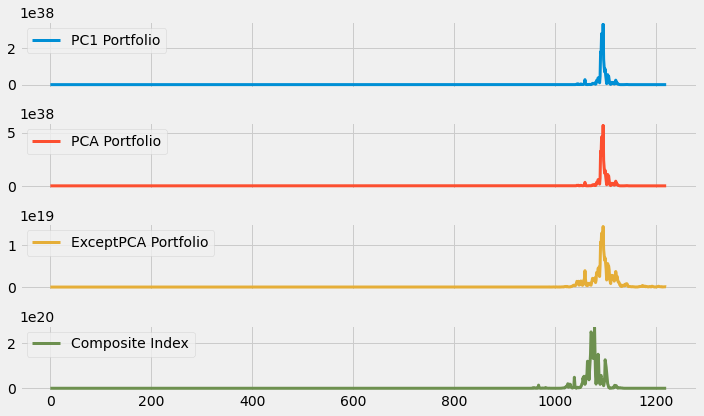

In [ ]:
rs_df_except.fillna(0).cumsum().apply(np.exp).plot(subplots=True, figsize=(10, 6), grid=True, linewidth=3)
plt.tight_layout()

In [ ]:
kstest_normal(myrs_recover_exceptPC2.iloc[:80,:], 'norm')

KstestResult(statistic=0.8580379109089658, pvalue=4.077527133167423e-68)

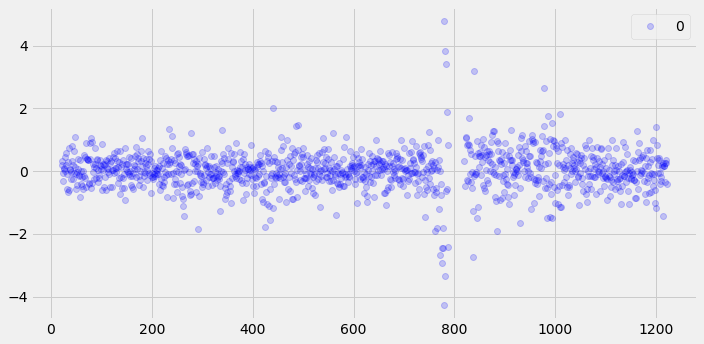

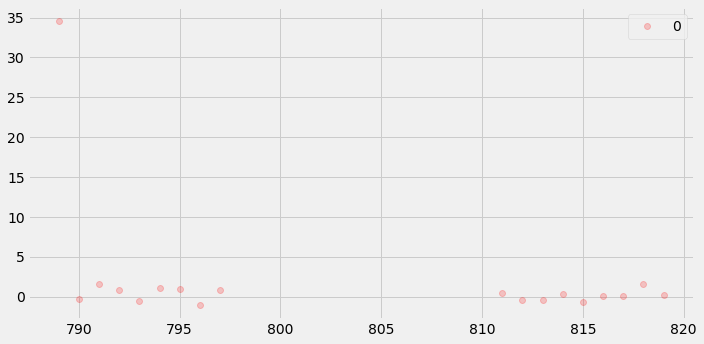

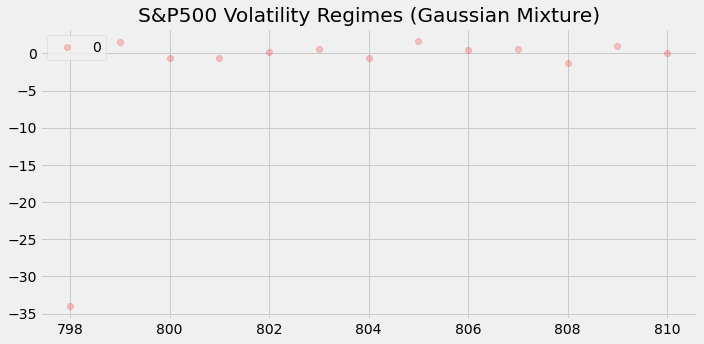

In [ ]:
w = 22
vol = myrs_recover_exceptPC2.rolling(w).std()
vol = vol.dropna()

labels = GaussianMixture(3).fit_predict(vol.values.reshape(-1, 1))

prices = myrs_recover_exceptPC2.reindex(vol.index)
prices[labels == 0].plot(style='bo', alpha=0.2)
prices[labels == 1].plot(subplots = True, style='ro', alpha=0.2)
prices[labels == 2].plot(subplots = True, style='ro', alpha=0.2)
plt.title('S&P500 Volatility Regimes (Gaussian Mixture)')
plt.tight_layout()
plt.savefig('gmm.png')

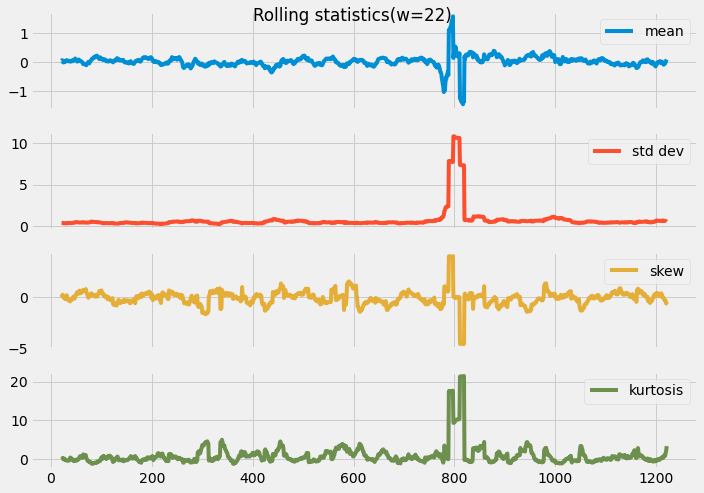

In [ ]:
w=22

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = myrs_recover_exceptPC2  

    s1 = temp.rolling(w).mean()
    s2 = temp.rolling(w).std()
    s3 = temp.rolling(w).skew()
    s4 = temp.rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=22)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

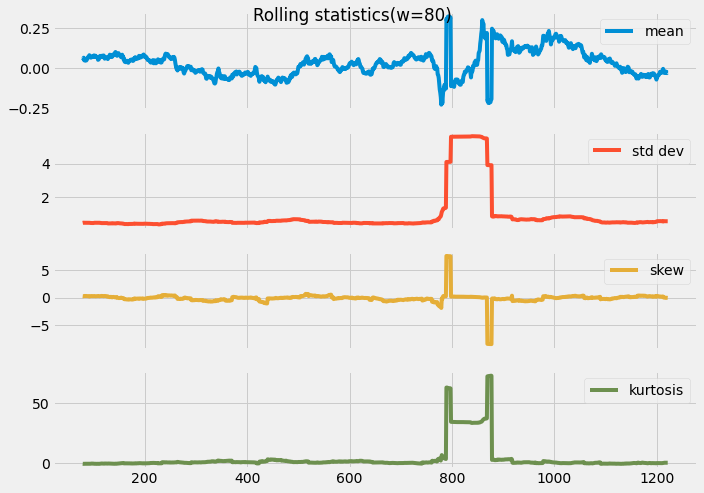

In [ ]:
w=80

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = myrs_recover_exceptPC2  

    s1 = temp.rolling(w).mean()
    s2 = temp.rolling(w).std()
    s3 = temp.rolling(w).skew()
    s4 = temp.rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=80)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

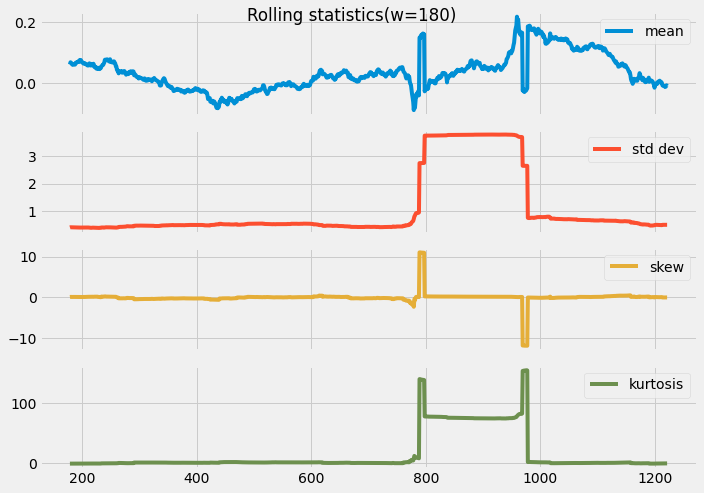

In [ ]:
w=180

for x in range(1, 1222, 1222):
    start = x
    end = x+1222
    temp = myrs_recover_exceptPC2  

    s1 = temp.rolling(w).mean()
    s2 = temp.rolling(w).std()
    s3 = temp.rolling(w).skew()
    s4 = temp.rolling(w).kurt()
    signals = pd.concat([s1, s2, s3, s4], axis=1)
    signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
    signals.plot(title='Rolling statistics(w=180)', subplots=True, figsize=(10,7));
    plt.tight_layout()
    plt.show

## ***Q4. PCA according to sub-interval***

### PCA (Principal component analysis)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
rs2 = return_full.iloc[:,2:12]

rs2

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,2.778681,-0.331676,3.178111,-2.534988,-1.081076,-0.565513,-0.986449,-2.429278,-0.587879,-0.998356
1,0.053737,0.991759,0.402822,1.655039,-0.970885,1.127833,0.371072,2.229056,1.984864,0.111426
2,2.754408,-2.329570,3.651119,0.503757,1.452818,4.567006,-0.495069,7.525269,0.230960,0.886931
3,1.349290,-0.337258,-1.957009,0.750953,-1.574842,1.769946,0.618443,-0.933722,1.715295,0.220496
4,-3.514677,0.673388,-0.594652,-1.507559,2.412668,-0.704221,0.000000,0.374544,-0.568506,-1.330380
...,...,...,...,...,...,...,...,...,...,...
1217,0.748136,3.062664,0.391390,1.574837,1.318698,-2.071781,1.063211,0.176214,0.000000,-0.263510
1218,-0.373363,-0.932404,-1.574836,-0.915645,-1.318698,0.961544,-0.353143,-0.884178,-1.227011,0.000000
1219,0.124606,0.233919,1.183446,1.045768,0.441501,0.794285,-0.354404,0.707965,0.176212,0.657471
1220,-1.435085,0.947874,0.822269,-0.521934,0.486268,1.282069,2.304529,0.179372,1.436258,1.217054


In [ ]:
rs4 =  pd.concat([pd.DataFrame(return_full.iloc[:,0]),rs2],axis =1)

rs4.rename(columns= {'Unnamed: 0':'DatePeriod'}, inplace = True)
rs4

,DatePeriod,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1,2.778681,-0.331676,3.178111,-2.534988,-1.081076,-0.565513,-0.986449,-2.429278,-0.587879,-0.998356
1,2,0.053737,0.991759,0.402822,1.655039,-0.970885,1.127833,0.371072,2.229056,1.984864,0.111426
2,3,2.754408,-2.329570,3.651119,0.503757,1.452818,4.567006,-0.495069,7.525269,0.230960,0.886931
3,4,1.349290,-0.337258,-1.957009,0.750953,-1.574842,1.769946,0.618443,-0.933722,1.715295,0.220496
4,5,-3.514677,0.673388,-0.594652,-1.507559,2.412668,-0.704221,0.000000,0.374544,-0.568506,-1.330380
...,...,...,...,...,...,...,...,...,...,...,...
1217,1218,0.748136,3.062664,0.391390,1.574837,1.318698,-2.071781,1.063211,0.176214,0.000000,-0.263510
1218,1219,-0.373363,-0.932404,-1.574836,-0.915645,-1.318698,0.961544,-0.353143,-0.884178,-1.227011,0.000000
1219,1220,0.124606,0.233919,1.183446,1.045768,0.441501,0.794285,-0.354404,0.707965,0.176212,0.657471
1220,1221,-1.435085,0.947874,0.822269,-0.521934,0.486268,1.282069,2.304529,0.179372,1.436258,1.217054


In [ ]:
scaler = StandardScaler()
pc_num = 10
pca4 = PCA(n_components= pc_num, svd_solver='auto')
pcs_col = ['PC' + str(1+i) for i in range(pc_num)]
pcs4_all_df = pd.DataFrame()

for x in range(0, 1222, 80):
    start = x
    end = x+80
    temp = rs4[(rs4["DatePeriod"] >= start) & (rs4["DatePeriod"] < end)]
    temp = temp.iloc[:,1:]    
    rs4_std = pd.DataFrame(scaler.fit_transform(temp))
    pca4.fit(rs4_std)
    pc4_df = pd.DataFrame(pca4.components_)
    pc4_df.columns = rs2.columns
    pcs4_df = pd.DataFrame(pc4_df.T)
    pcs4_df.columns = pcs_col
    pcs4_all_df = pd.concat([pcs4_all_df, pcs4_df], axis = 1)



In [ ]:
pcs4_all_df.to_csv("pcs4_all_df.csv")

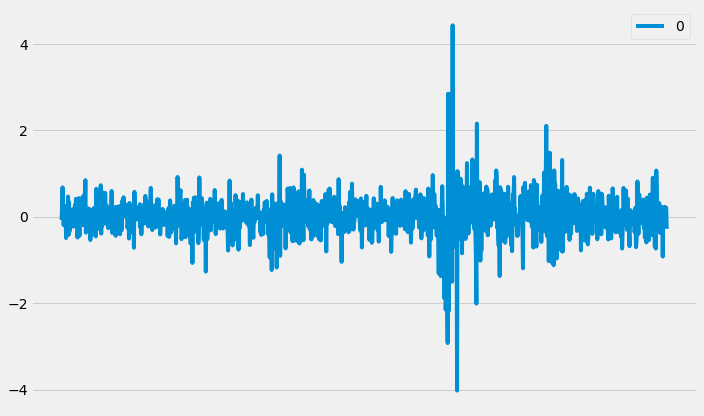

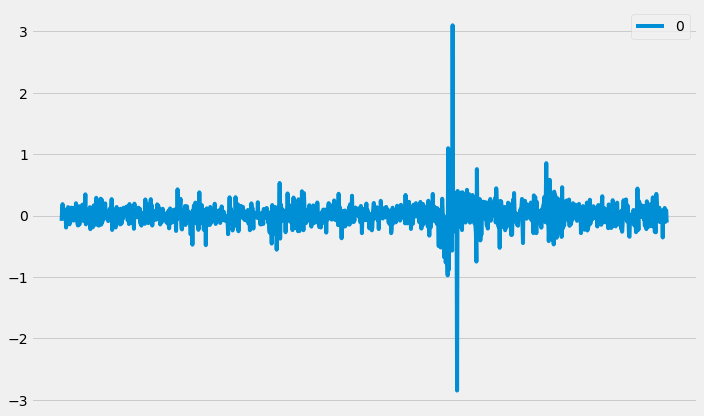

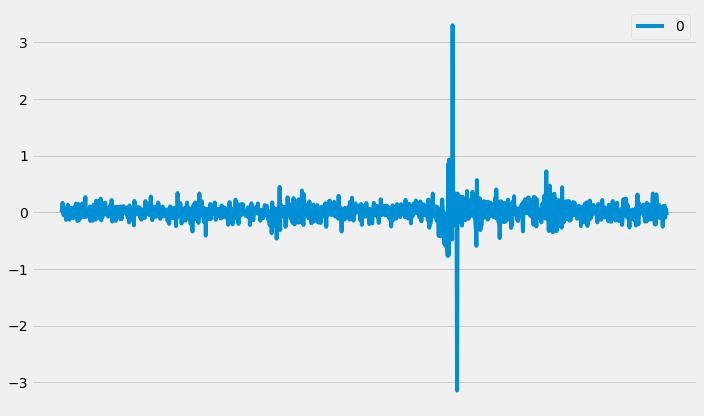

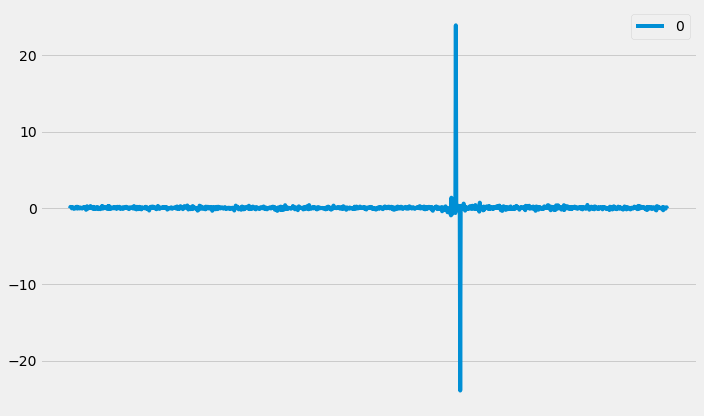

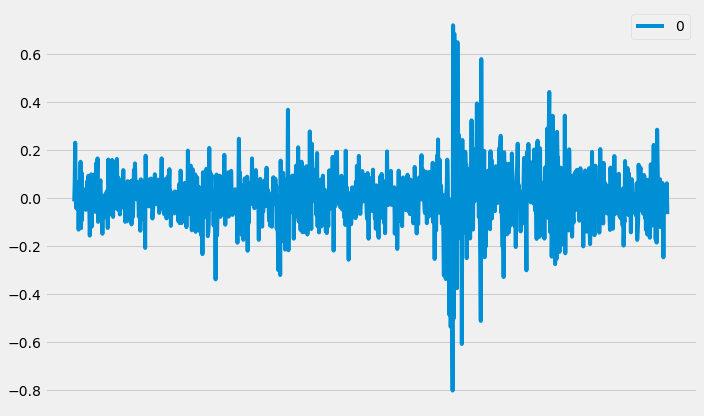

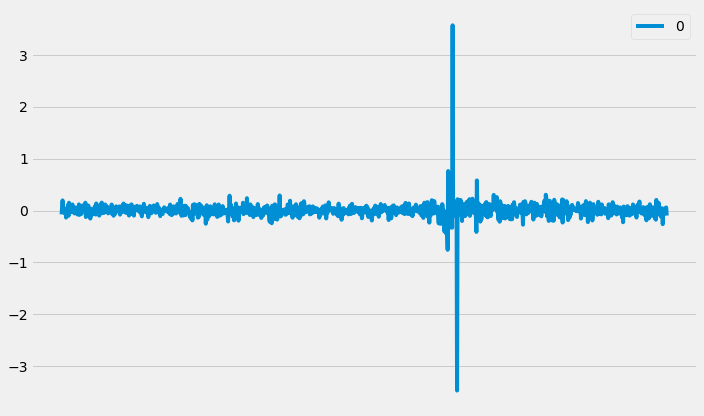

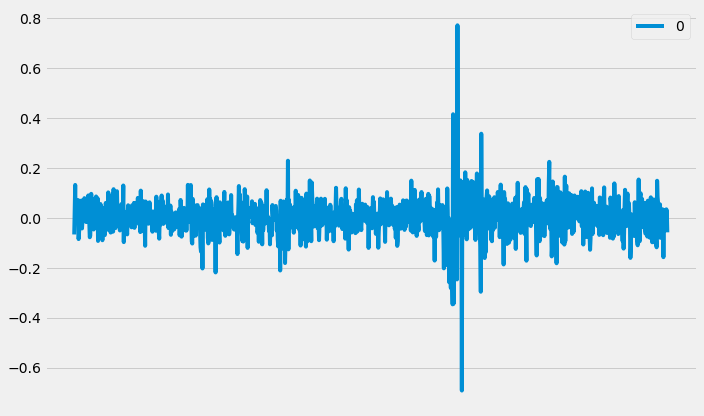

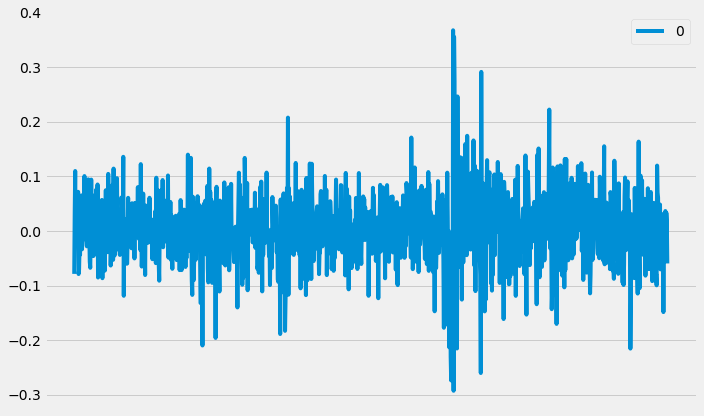

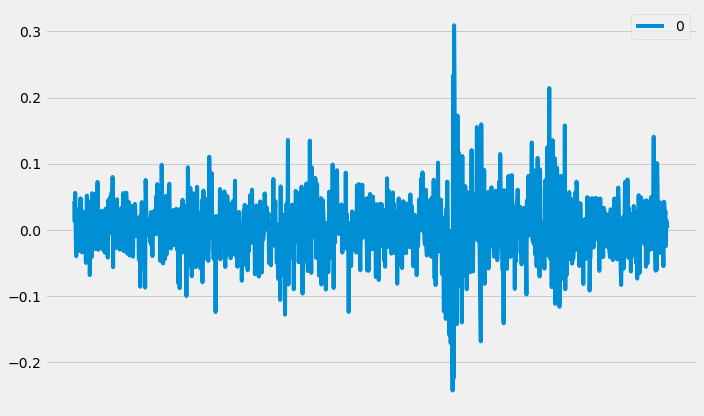

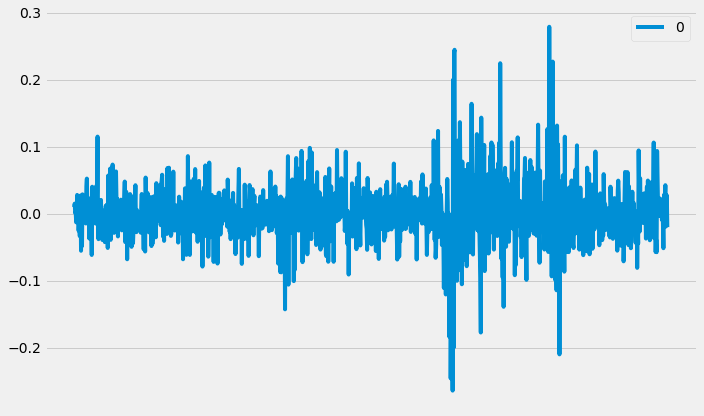

In [ ]:
for i in range(10):
  temp = weights_recover.copy()
  temp.iloc[:i,0] = 0
  temp.iloc[i+1:,0] = 0
  temp_recover_exceptPCs = myrs_df.dot(temp)
  temp_recover_exceptPCs.plot(figsize=(10, 6), xticks=[], grid=True)
  plt.tight_layout()



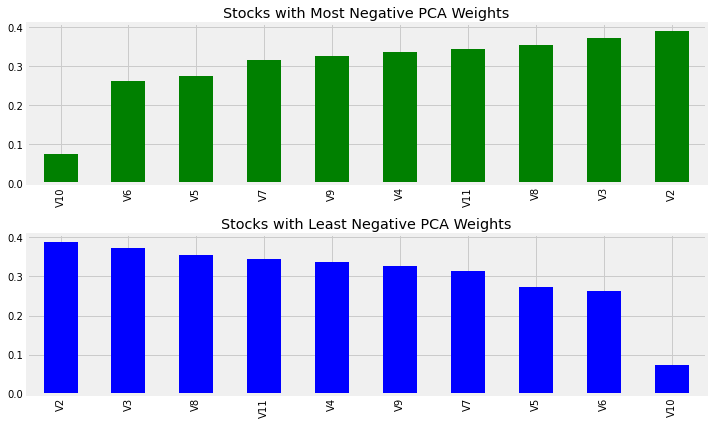

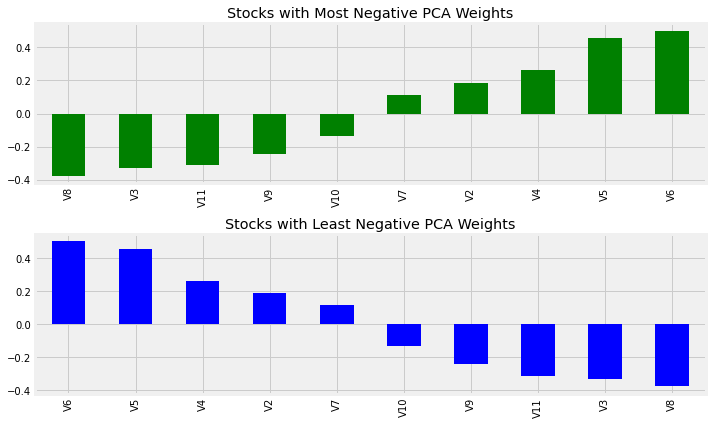

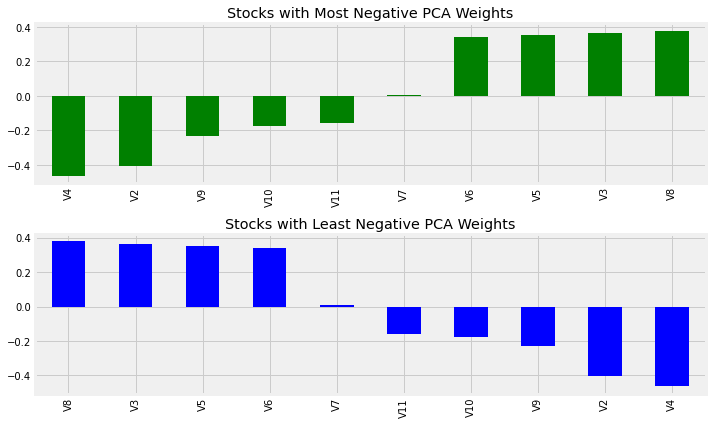

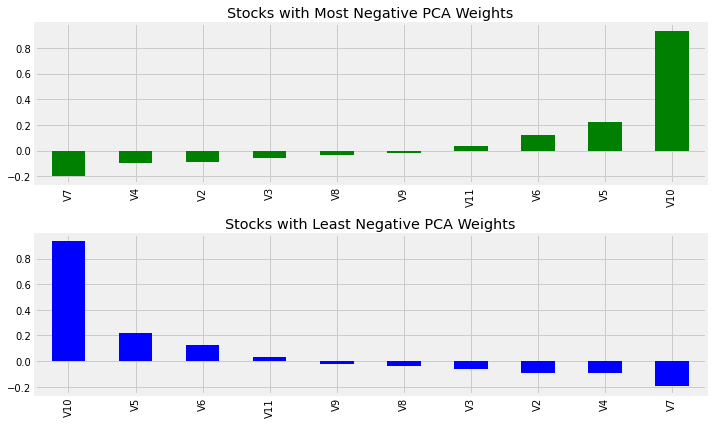

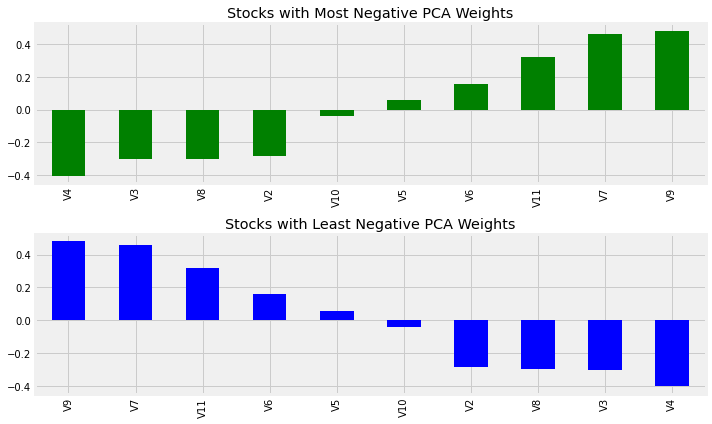

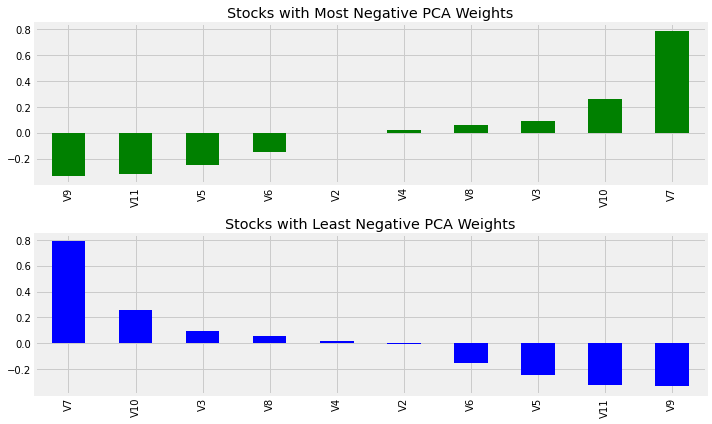

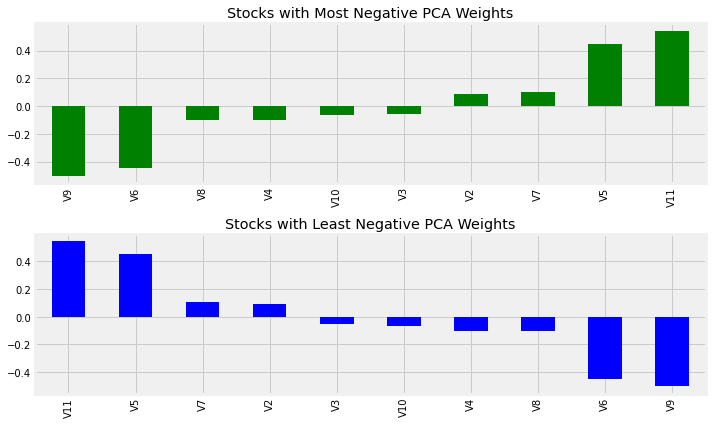

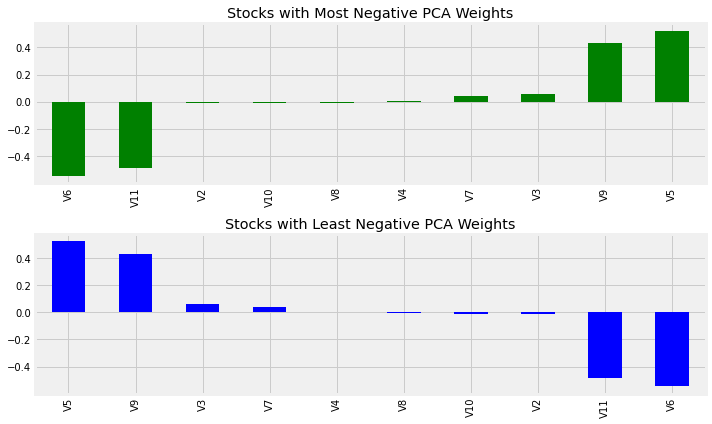

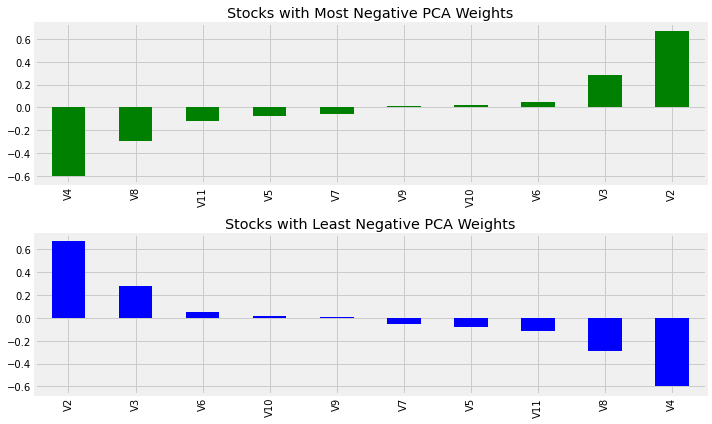

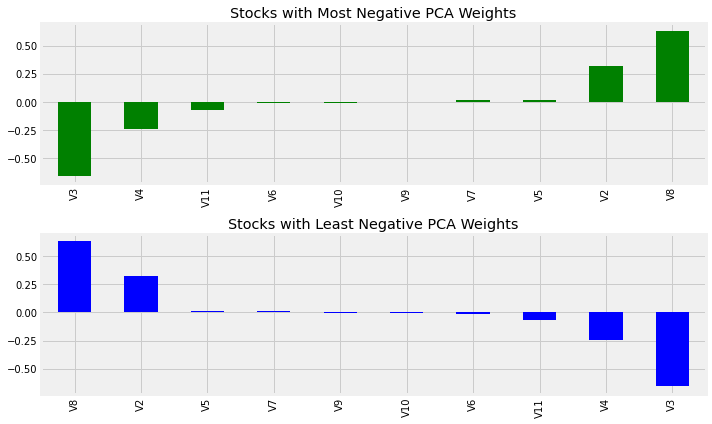

In [ ]:
for i in range(len(pcs_df.columns)):
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  pcs_df[pcs_col[i]].nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
  pcs_df[pcs_col[i]].nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

  plt.tight_layout()

## ***Q5. LDA***

### DataPreprocessing before LDA

In [ ]:
import os.path

In [ ]:
#LDA를 위한 데이터 전처리: 일별 데이터 -> 월별 대표값 
#full data 이용

data_first = pd.DataFrame(return_first.iloc[:, 2:])
data_last = pd.DataFrame(return_last.iloc[:, 2:])
data_full = pd.DataFrame(return_full.iloc[:, 2:])

start_date_first = pd.to_datetime('2017-01-01') 
end_date_last = pd.to_datetime('2020-05-06') 

data_first_periods = len(data_first.T.columns)
data_last_periods = len(data_last.T.columns)
data_full_periods = len(data_full.T.columns)

date_first_df = pd.date_range(start_date_first, periods = data_first_periods , freq ='D')
date_last_df = pd.date_range(end = end_date_last, periods = data_last_periods , freq ='D')
date_full_df = pd.date_range(start_date_first, periods = data_full_periods , freq ='D')

date_first_df = pd.DataFrame(date_first_df)
date_last_df = pd.DataFrame(date_last_df)
date_full_df = pd.DataFrame(date_full_df)

column_names_date =['DateTime']

date_first_df.columns = column_names_date
date_last_df.columns = column_names_date
date_full_df.columns = column_names_date

print(date_first_df, date_last_df, date_full_df)

      DateTime
0   2017-01-01
1   2017-01-02
2   2017-01-03
3   2017-01-04
4   2017-01-05
..         ...
112 2017-04-23
113 2017-04-24
114 2017-04-25
115 2017-04-26
116 2017-04-27

[117 rows x 1 columns]       DateTime
0   2019-09-05
1   2019-09-06
2   2019-09-07
3   2019-09-08
4   2019-09-09
..         ...
240 2020-05-02
241 2020-05-03
242 2020-05-04
243 2020-05-05
244 2020-05-06

[245 rows x 1 columns]        DateTime
0    2017-01-01
1    2017-01-02
2    2017-01-03
3    2017-01-04
4    2017-01-05
...         ...
1217 2020-05-02
1218 2020-05-03
1219 2020-05-04
1220 2020-05-05
1221 2020-05-06

[1222 rows x 1 columns]


In [ ]:
#데이터 앞에 날짜 붙이기
data_first_date = pd.concat([date_first_df,data_first], axis=1)
data_last_date = pd.concat([date_last_df,data_last], axis=1)
data_full_date = pd.concat([date_full_df,data_full], axis=1)

#datetime 메소드 적용
data_first_date['DateTime'] = pd.to_datetime(data_first_date['DateTime'])
data_last_date['DateTime'] = pd.to_datetime(data_last_date['DateTime'])
data_full_date['DateTime'] = pd.to_datetime(data_full_date['DateTime'])

#각 데이터 별로 평균
data_first_date['YearMonth'] = data_first_date['DateTime'].dt.to_period('M')
year_month_first = data_first_date.groupby('YearMonth').mean().reset_index()

data_last_date['YearMonth'] = data_last_date['DateTime'].dt.to_period('M')
year_month_last = data_last_date.groupby('YearMonth').mean().reset_index()

data_full_date['YearMonth'] = data_full_date['DateTime'].dt.to_period('M')
year_month_full = data_full_date.groupby('YearMonth').mean().reset_index()

In [ ]:
year_month_full = pd.DataFrame(year_month_full)
year_month_full

,YearMonth,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,2017-01,0.265049,-3.220439e-02,0.170163,-0.008085,0.216128,0.159696,-1.958108e-01,0.517473,0.326989,0.132538
1,2017-02,0.256088,5.922923e-02,0.028122,0.229934,-0.154948,0.044445,-1.912864e-01,-0.213776,0.108064,-0.038035
2,2017-03,0.210679,3.610247e-01,0.249432,-0.030504,0.465377,0.073253,2.434921e-01,0.115220,0.330576,0.187834
3,2017-04,0.201563,-2.655751e-01,0.701193,-0.027828,0.115810,0.017227,-1.036357e-01,0.138251,0.203900,0.003365
4,2017-05,-0.046435,-2.470208e-01,-0.047790,-0.203299,0.328839,0.586286,-2.331863e-01,0.361090,-0.045355,0.149472
5,2017-06,0.404020,1.466669e-01,0.935224,-0.121226,0.907145,0.395792,-3.370873e-01,-0.065588,0.081589,-0.117659
6,2017-07,0.187503,8.433962e-02,-0.069849,0.186515,0.116928,0.191215,1.189373e-01,-0.101609,-0.096131,-0.124716
7,2017-08,-0.410086,7.384988e-02,-0.519073,0.480086,-0.102330,0.045886,6.893633e-02,0.599985,0.617078,0.368887
8,2017-09,-0.112439,7.419463e-02,0.195352,-0.376039,-0.636851,-0.227690,9.446330e-02,-0.090708,-0.066312,-0.267602
9,2017-10,0.134988,-1.665298e-01,0.126839,-0.217281,-0.026226,-0.179021,-1.704598e-01,-0.342746,-0.319440,-0.245466


In [ ]:
scaler = StandardScaler()
year_month_full_std = pd.DataFrame(scaler.fit_transform(year_month_full.iloc[:, 1:]))

In [ ]:
pca_5 = PCA(n_components= 10)
pca_5.fit(year_month_full_std)

print(pca_5.explained_variance_ratio_)

pc_df_5 = pd.DataFrame(pca_5.components_)
pc_df_5.columns = year_month_full_std.columns
pcs_df_5 = pc_df_5.T
pcs_df_5.columns = pcs_col


#Loadings

weights_df_5 = pd.DataFrame()

for i in range(len(pcs_df_5.columns)):
  weights_pcs_5 = abs(pcs_df_5[pcs_col[i]]) / sum(abs(pcs_df_5[pcs_col[i]]))
  weights_df_5 = pd.concat([weights_df_5,weights_pcs_5], axis=1)

Loadings = weights_df_5.iloc[:, :6]

myrs_df_5 = pd.DataFrame()

for i in range(len(pcs_df_5.columns)):
  weights_pcs_5 = abs(pcs_df_5[pcs_col[i]]) / sum(abs(pcs_df_5[pcs_col[i]]))
  myrs_pcs_5 = (weights_pcs_5 * year_month_full_std).sum(1)
  myrs_df_5 = pd.concat([myrs_df_5,myrs_pcs_5], axis=1)


myrs_df_5.columns = pcs_col
pca_fundamental_score = myrs_df_5

[0.48058446 0.15294185 0.14032588 0.06493946 0.05670609 0.03883309
 0.02173899 0.01956729 0.01745865 0.00690423]


In [ ]:
Loadings

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.101453,0.034654,0.205289,0.039197,0.017121,0.014292
1,0.116603,0.077628,0.062900,0.153130,0.142859,0.061627
2,0.067965,0.018624,0.261048,0.107352,0.104360,0.005248
3,0.078633,0.164551,0.093073,0.005343,0.204779,0.235041
4,0.094151,0.138465,0.021904,0.195619,0.078152,0.241696
5,0.107435,0.104126,0.049272,0.133711,0.178594,0.086386
6,0.121471,0.029627,0.093149,0.177907,0.041562,0.035820
7,0.102193,0.145035,0.011525,0.134495,0.076162,0.188722
8,0.103675,0.132566,0.125829,0.004926,0.094362,0.039972
9,0.106423,0.154724,0.076013,0.048319,0.062050,0.091195


No handles with labels found to put in legend.
No handles with labels found to put in legend.


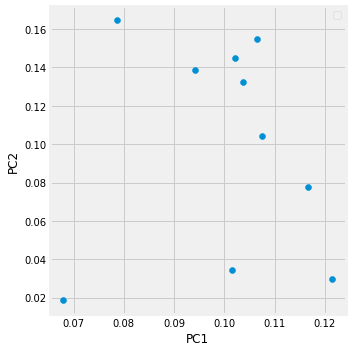

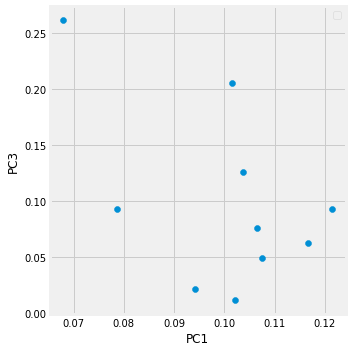

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Color classes
plt.rcParams['figure.figsize'] = (5,5)

fig, ax = plt.subplots()
ax.scatter(x=Loadings["PC1"], y=Loadings["PC2"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


fig, ax = plt.subplots()
ax.scatter(x=Loadings["PC1"], y=Loadings["PC3"])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend()


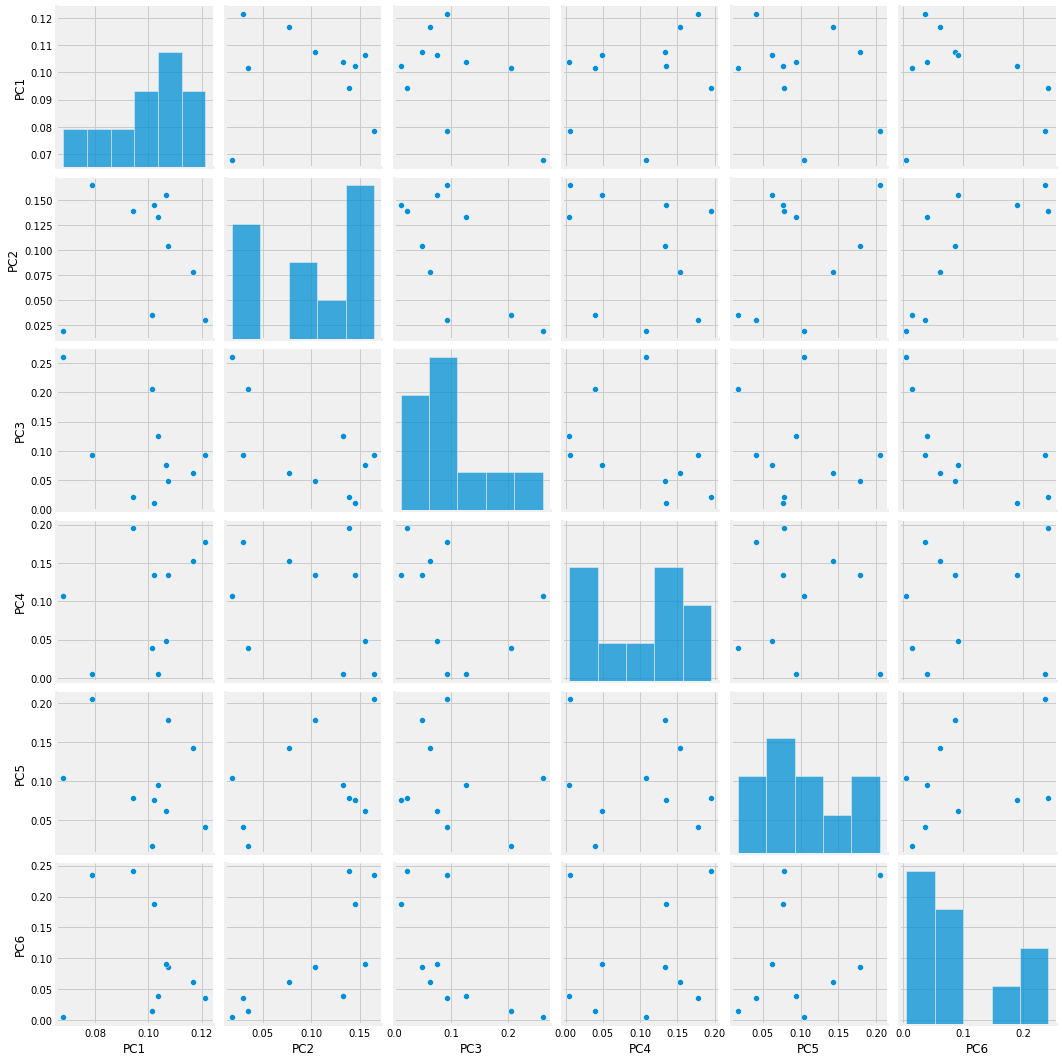

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# color_label = le.fit_transform(pca_fundamental_score['GICS Sector'])
# color_map = sns.color_palette("muted", len(pca_fundamental_score['GICS Sector']))
# print(np.array([(idx, cls) for idx, cls in enumerate(le.classes_)]))

data = Loadings.copy()
# restore sector flags to see if groups can be identified by PCs
# data['GICS Sector'] = data.index.map(security_industry_map)

grid = sns.pairplot(data)
plt.show()

## ***Q8.***

##PCA 공분산

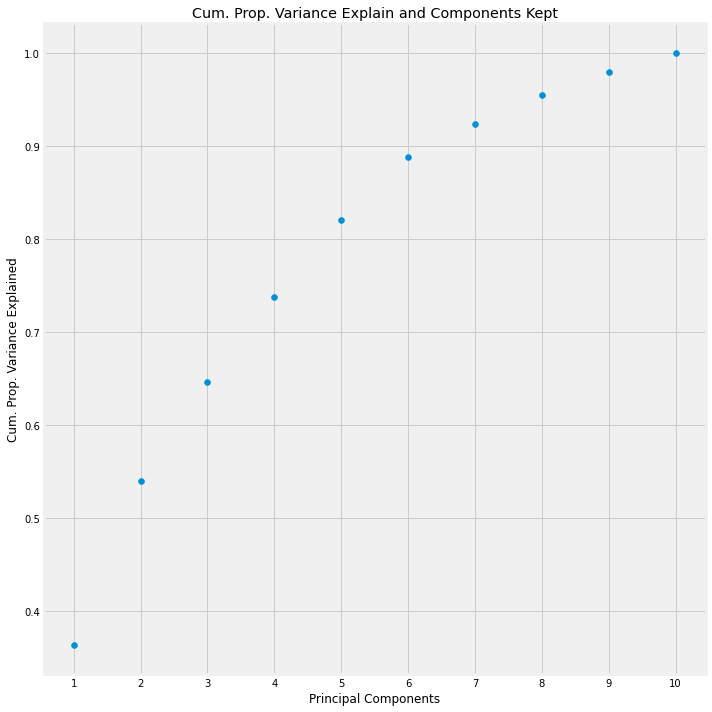

In [ ]:
data = pd.DataFrame(return_last.iloc[:, 1:])

x = data

#Standardization
scaler1 = StandardScaler()
x_std = scaler1.fit_transform(x)

#min 0, max 1 scaling
scaler2 = MinMaxScaler()
x_minmax = scaler2.fit_transform(x)

pca = PCA() #PC의 변수 k = 10
principalcomponents = pca.fit_transform(x_std)
principal_df = pd.DataFrame(data=principalcomponents)
column_names = ['PC' + str(1+i) for i in range(len(principal_df.columns))]
principal_df.columns = column_names

#explained variance

var_comp_sum  = np.cumsum(pca.explained_variance_ratio_)
#var_comp_sum = pd.Series(np.cumsum(pca.explained_variance_ratio_))

# x-axis for number of principal components kept
num_comp = range(1, len(pca.explained_variance_ratio_) + 1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Explained')
plt.xticks(range(11), range(11))

plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(num_comp, var_comp_sum)
plt.show()

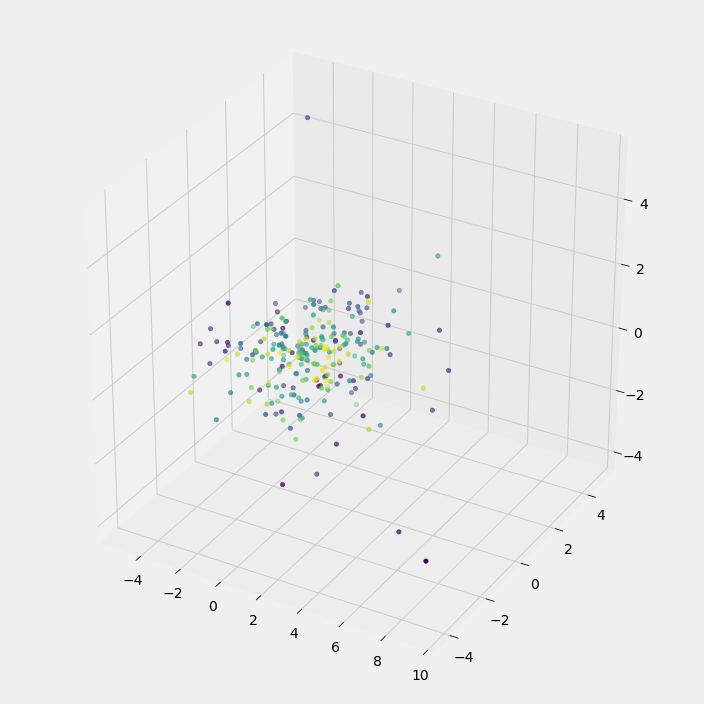

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=principal_df.index)
plt.show()

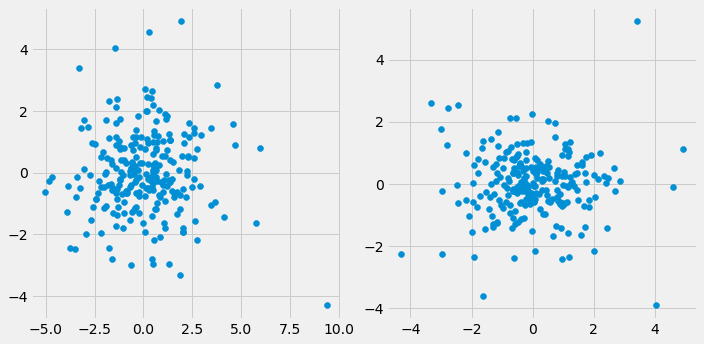

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
fig = plt.figure()
plt.subplot(1, 2, 1) 
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.subplot(1, 2, 2) 
plt.scatter(principal_df['PC2'], principal_df['PC3'])
plt.show()

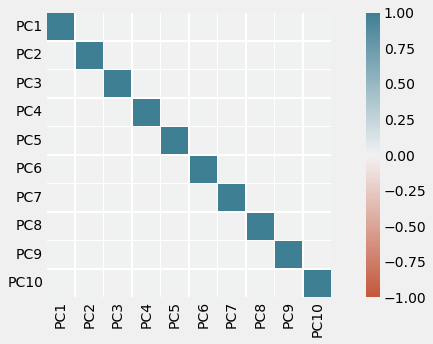

In [ ]:
palette = sns.diverging_palette(20, 220, n=256)

corr_matrix = principal_df.corr(method = 'pearson')
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = palette,
                      vmin = -1, 
                      vmax = 1,
                      annot = False,)

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


##Factor analysis 공분산

In [ ]:
!pip install scikit-learn
!pip install factor-analyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 41 kB 305 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=227bbede4f6538a3ec35ac18d9d97a333bdfab14ca269170a0f5045ffb7cfc42
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
fa_varimax_std = FactorAnalyzer(n_factors=2, method='ml',
                                rotation='varimax', is_corr_matrix=False).fit(x_std)

In [ ]:
x_std = pd.DataFrame(x_std)
x_std.columns = ['V2', 'V3','V4','V5','V6','V7','V8','V9','V10', 'V11']

In [ ]:
fa_varimax_std_loadings = pd.DataFrame(fa_varimax_std.loadings_.T)
fa_varimax_std_loadings.columns = x_std.columns

In [ ]:
fa_promax_std = FactorAnalyzer(n_factors=2, method='ml',
                               rotation='promax', is_corr_matrix=False).fit(x_std)

In [ ]:
fa_promax_std_loadings = pd.DataFrame(fa_promax_std.loadings_.T)
fa_promax_std_loadings.columns = x_std.columns

In [ ]:
fa_promax_std_loadings

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.719630,0.794729,0.545350,0.612236,0.521515,0.271907,0.672785,0.129012,-0.126767,-0.114747
1,0.110954,-0.006242,0.078331,-0.112040,-0.120258,0.121250,-0.005886,0.433189,0.894966,0.939966


##***Q10.***

In [ ]:
return_full_V1

,DatePeriod,V1
0,1,-0.016598
1,2,-0.178804
2,3,1.458658
3,4,0.575162
4,5,-0.497121
...,...,...
1217,1218,0.474496
1218,1219,-0.428475
1219,1220,0.687400
1220,1221,-0.896317


predicted=0.130522, expected=-0.201029
predicted=0.346550, expected=0.653637
predicted=0.124677, expected=-0.283708
predicted=0.074000, expected=-1.008140
predicted=-0.010425, expected=-0.350179
predicted=-0.235823, expected=-0.520735
predicted=-0.085657, expected=1.060926
predicted=-0.033423, expected=0.129445
predicted=0.256343, expected=-0.909662
predicted=0.150130, expected=0.234769
predicted=-0.160011, expected=0.133864
predicted=-0.136404, expected=0.178711
predicted=-0.007199, expected=-1.251530
predicted=0.260970, expected=0.644946
predicted=-0.121920, expected=0.436517
predicted=0.112974, expected=1.326904
predicted=0.152466, expected=-0.129642
predicted=0.202991, expected=-0.176271
predicted=0.192167, expected=-0.304411
predicted=-0.176848, expected=-0.529860
predicted=-0.089194, expected=-0.698347
predicted=-0.030835, expected=-0.380782
predicted=-0.097878, expected=-1.162764
predicted=0.039192, expected=-0.893204
predicted=-0.074702, expected=0.502692
predicted=-0.137744, e

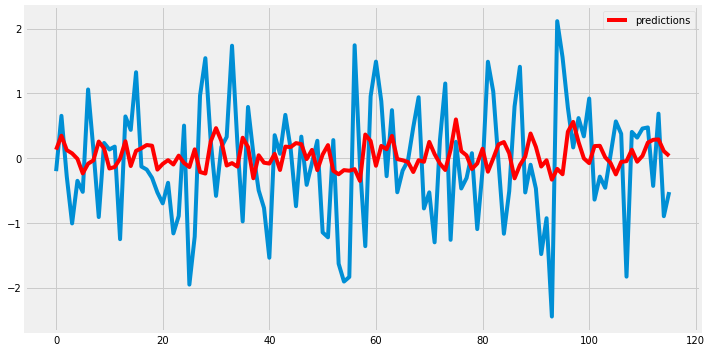

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = (10,5)

series = return_full_V1['V1'].copy()
# split dataset
X = series.values
train, test = X[1:len(X)-116], X[len(X)-116:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red', label ='predictions')
pyplot.legend()
pyplot.show()